In [330]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [331]:
pip install cenpy

Note: you may need to restart the kernel to use updated packages.


In [332]:
import cenpy
import geopandas
from cenpy import products
import matplotlib as mpl
%matplotlib inline

In [333]:
###create a dictionary with the variables ID as key and what they are as value, form a list of keys to be able to iterate through
variables_dict = { 
    'B01003_001E': 'Population',
    'B02001_002E': 'White Population',
    'B02001_003E': 'Black Population',
    'B15003_002E': 'Pop w/ Bachelor degree',
    'B02001_005E' : 'Asian Population',
    'B19013_001E': 'median_hh_income'
    }
list_vars = list(variables_dict.keys())
master_columns = variables_dict.values()

In [334]:
###Extract our data sets from the census data(cenpy)
###%%time
san_diego_csa_2019 = cenpy.products.ACS(2019).from_msa('San Diego, CA', level = 'tract', variables = list_vars)
san_diego_csa_2017 = cenpy.products.ACS(2017).from_msa('San Diego, CA', level = 'tract', variables = list_vars)

C:\Users\Tyler Marino\Documents\anaconda\lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(
C:\Users\Tyler Marino\Documents\anaconda\lib\site-packages\cenpy\products.py:748: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(


In [335]:
###Rename the columns of both data sets so we know what we are dealing with.
san_diego_csa_renamed_2019 = san_diego_csa_2019.rename(columns = variables_dict)
san_diego_csa_renamed_2019 = san_diego_csa_renamed_2019.sort_values(by =['tract'])
san_diego_csa_renamed_2017 = san_diego_csa_2017.rename(columns =variables_dict)
san_diego_csa_renamed_2017 = san_diego_csa_renamed_2017.sort_values(by =['tract'])
#san_diego_csa_renamed_2019.head(5)

In [336]:
san_diego_csa_renamed_2017.head(5)

GEOID                                           geometry  \
7    06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
238  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
155  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   
77   06073000300  POLYGON ((-13043153.900 3862030.870, -13043127...   
476  06073000400  POLYGON ((-13043401.250 3863312.430, -13043325...   

     Population  White Population  Black Population  Asian Population  \
7        2863.0            2588.0               0.0              81.0   
238      2056.0            1879.0              10.0              77.0   
155      5021.0            4238.0              85.0             404.0   
77       5174.0            4405.0             225.0             249.0   
476      3717.0            2809.0              85.0             499.0   

     Pop w/ Bachelor degree  median_hh_income  \
7                       0.0          131607.0   
238                     0.0          101071.0   
155                     0.0           64080.0   
77                     46.0           69766.0   
476                     0.0           69783.0   

                                                NAME state county   tract  
7       Census Tract 1, San Diego County, California    06    073  000100  
238  Census Tract 2.01, San Diego County, California    06    073  000201  
155  Census Tract 2.02, San Diego County, California    06    073  000202  
77      Census Tract 3, San Diego County, California    06    073  000300  
476     Census Tract 4, San Diego County, California    06    073  000400

In [337]:
san_diego_csa_renamed_2017["area_sqkm"] = san_diego_csa_renamed_2017.to_crs(epsg=5070).area / 1e6
san_diego_csa_renamed_2019["area_sqkm"] = san_diego_csa_renamed_2019.to_crs(epsg=5070).area / 1e6


In [338]:
#print the number of census tracts and the total population

print('The number of census tracts is:', len(san_diego_csa_2019['tract']))
print('The total Population in 2019 was:', sum(san_diego_csa_renamed_2019['Population']))
print('The total Population in 2017 was:', sum(san_diego_csa_renamed_2017['Population']))
print('The total area in square kilometers is:', sum(san_diego_csa_renamed_2019["area_sqkm"]), 'km^2')

The number of census tracts is: 628
The total Population in 2019 was: 3316073.0
The total Population in 2017 was: 3283665.0
The total area in square kilometers is: 11721.77854661731 km^2


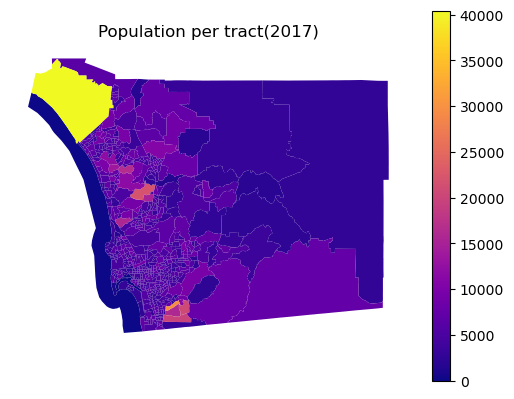

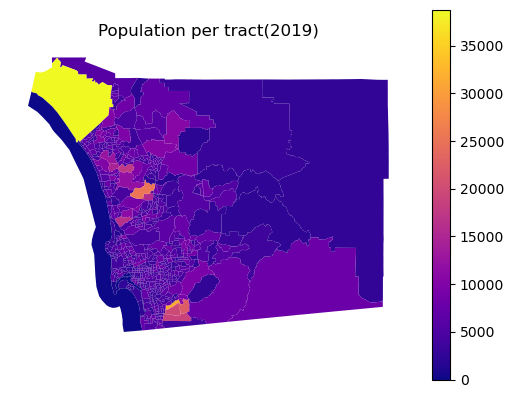

_________________________________________________________________________


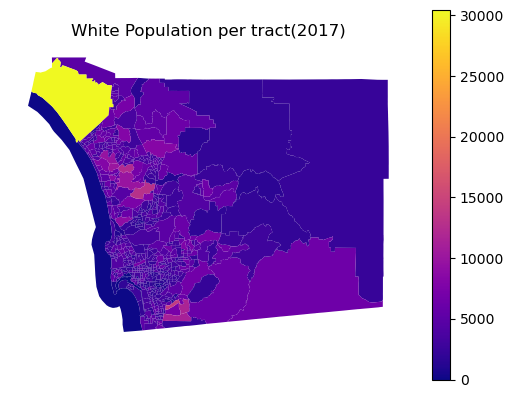

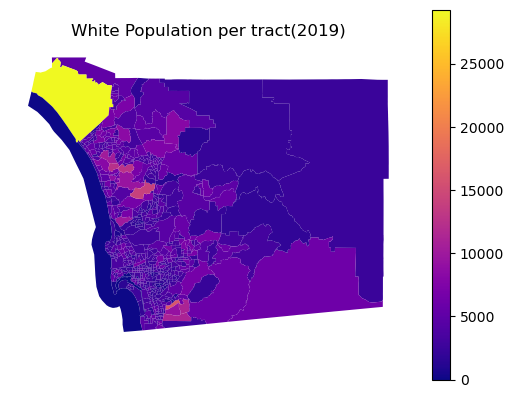

_________________________________________________________________________


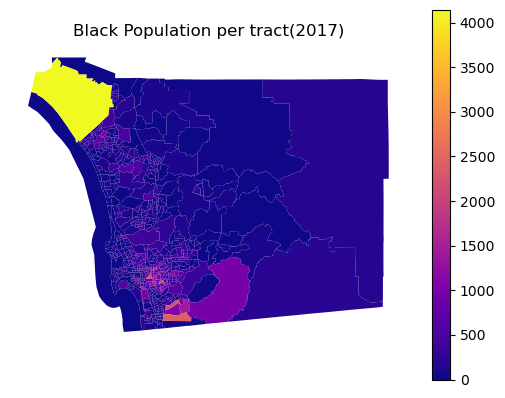

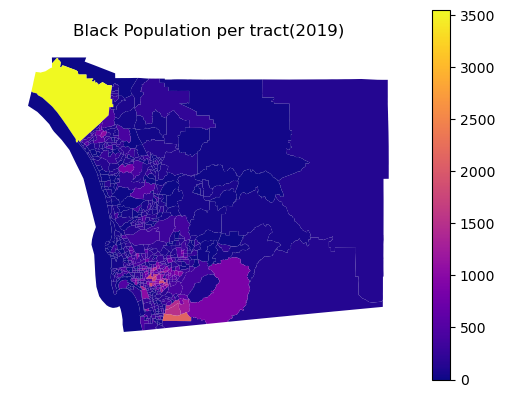

_________________________________________________________________________


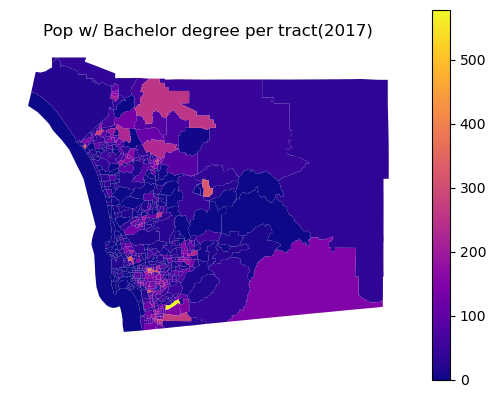

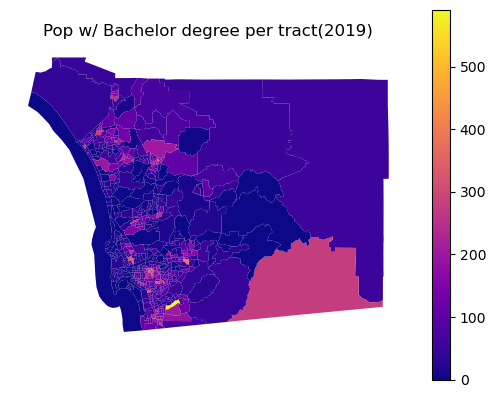

_________________________________________________________________________


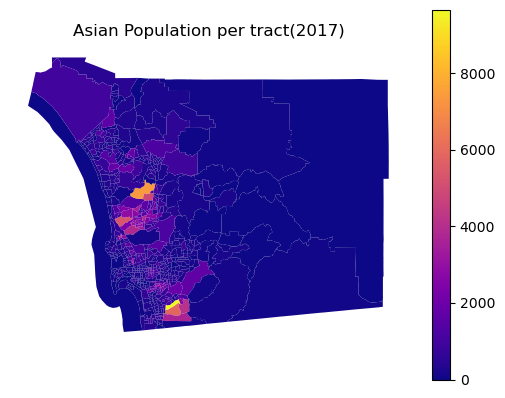

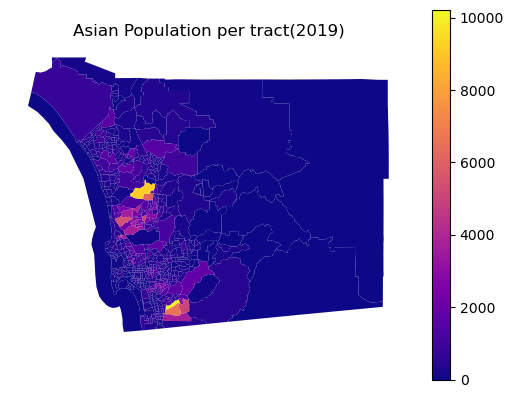

_________________________________________________________________________


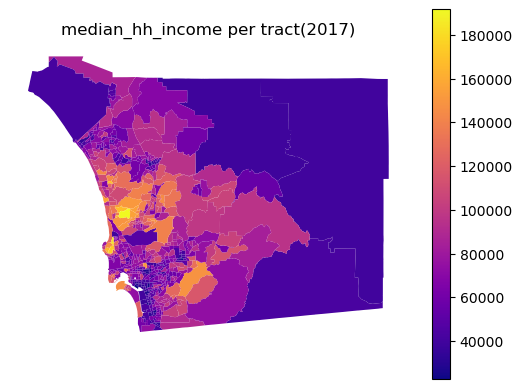

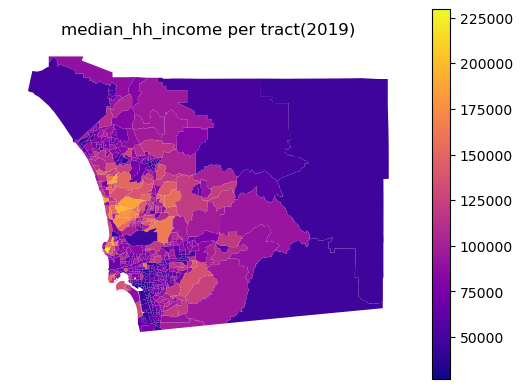

_________________________________________________________________________


In [339]:
###Visualize the data we have looked for in nice colorful maps
for column in variables_dict.keys():
  to_plot = san_diego_csa_2017.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{variables_dict.get(column)} per tract(2017)')
  plt.axis('off')
  plt.show()
  to_plot = san_diego_csa_2019.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{variables_dict.get(column)} per tract(2019)')
  plt.axis('off')
  plt.show()
  print('_________________________________________________________________________')


In [340]:
### Create function to form percentage tables. AKA all rows of the columns in question have values between 0 and 1
def percent_columns(df, columns):
  df_percent = df.copy()
  for column in columns[0:5]:
    df_percent[column] = df_percent[column]/sum(df_percent[column])
  return df_percent
sd_2019_percents = percent_columns(san_diego_csa_renamed_2019, list(master_columns))
sd_2017_percents = percent_columns(san_diego_csa_renamed_2017, list(master_columns))

In [341]:
sd_2017_percents.head(5)

GEOID                                           geometry  \
7    06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
238  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
155  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   
77   06073000300  POLYGON ((-13043153.900 3862030.870, -13043127...   
476  06073000400  POLYGON ((-13043401.250 3863312.430, -13043325...   

     Population  White Population  Black Population  Asian Population  \
7      0.000872          0.001113          0.000000          0.000211   
238    0.000626          0.000808          0.000061          0.000200   
155    0.001529          0.001822          0.000516          0.001052   
77     0.001576          0.001894          0.001367          0.000648   
476    0.001132          0.001208          0.000516          0.001299   

     Pop w/ Bachelor degree  median_hh_income  \
7                  0.000000          131607.0   
238                0.000000          101071.0   
155                0.000000           64080.0   
77                 0.001101           69766.0   
476                0.000000           69783.0   

                                                NAME state county   tract  \
7       Census Tract 1, San Diego County, California    06    073  000100   
238  Census Tract 2.01, San Diego County, California    06    073  000201   
155  Census Tract 2.02, San Diego County, California    06    073  000202   
77      Census Tract 3, San Diego County, California    06    073  000300   
476     Census Tract 4, San Diego County, California    06    073  000400   

     area_sqkm  
7     1.541456  
238   0.864208  
155   1.306002  
77    0.898762  
476   1.177450

In [342]:
sd_2019_percents.head(5)

GEOID                                           geometry  \
430  06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
431  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
198  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   
433  06073000300  POLYGON ((-13043153.900 3862030.870, -13043127...   
348  06073000400  POLYGON ((-13043401.250 3863312.430, -13043325...   

     Population  White Population  Black Population  Asian Population  \
430    0.000933          0.001197          0.000000          0.000307   
431    0.000570          0.000707          0.000060          0.000190   
198    0.001370          0.001661          0.000024          0.000960   
433    0.001580          0.001904          0.001931          0.000426   
348    0.001146          0.001196          0.001367          0.001089   

     Pop w/ Bachelor degree  median_hh_income  \
430                0.000000          138879.0   
431                0.000000           88125.0   
198                0.000000           76658.0   
433                0.000555           68679.0   
348                0.000000           70267.0   

                                                NAME state county   tract  \
430     Census Tract 1, San Diego County, California    06    073  000100   
431  Census Tract 2.01, San Diego County, California    06    073  000201   
198  Census Tract 2.02, San Diego County, California    06    073  000202   
433     Census Tract 3, San Diego County, California    06    073  000300   
348     Census Tract 4, San Diego County, California    06    073  000400   

     area_sqkm  
430   1.541456  
431   0.864208  
198   1.306002  
433   0.898762  
348   1.177452

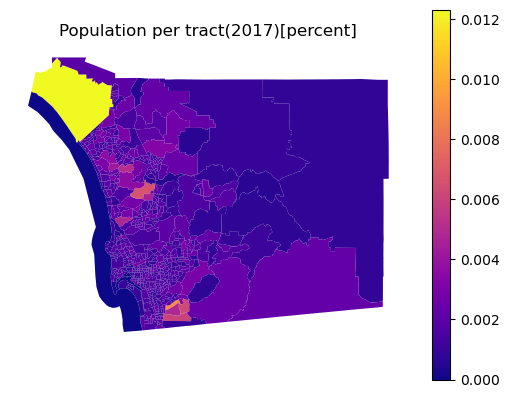

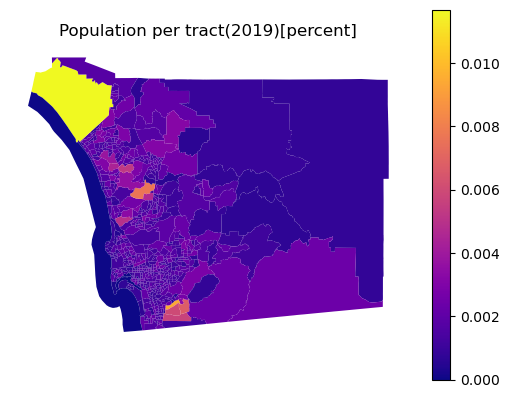

_________________________________________________________________________


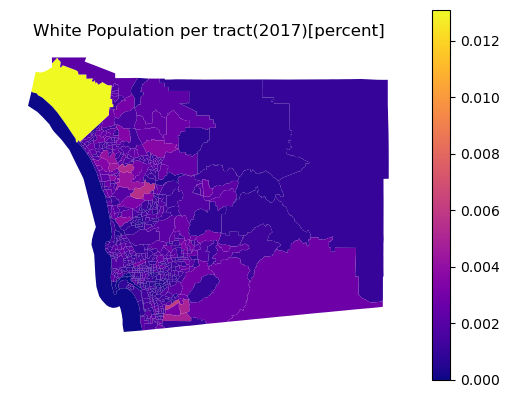

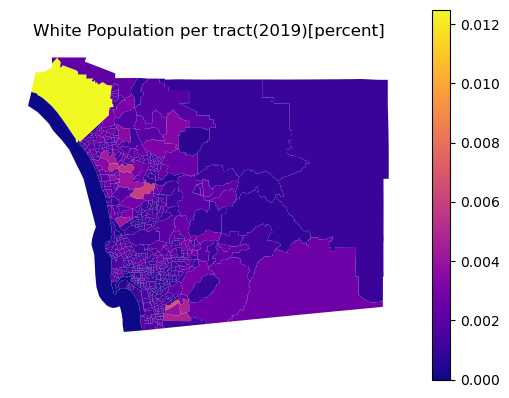

_________________________________________________________________________


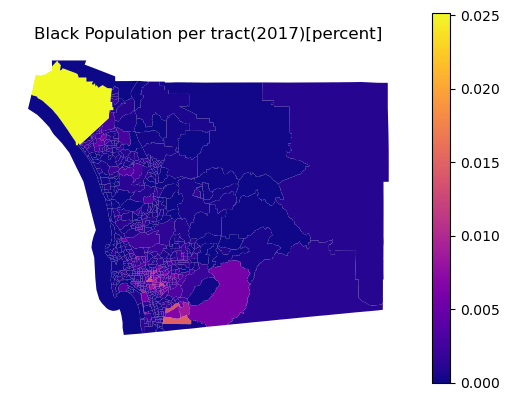

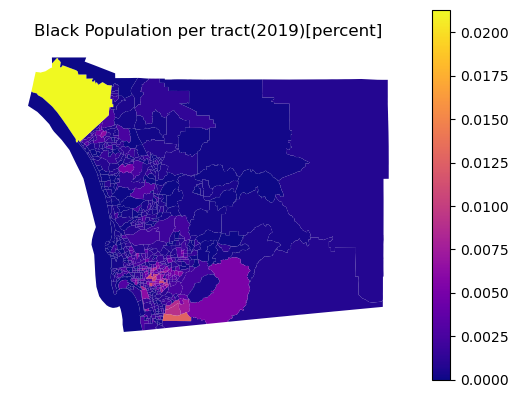

_________________________________________________________________________


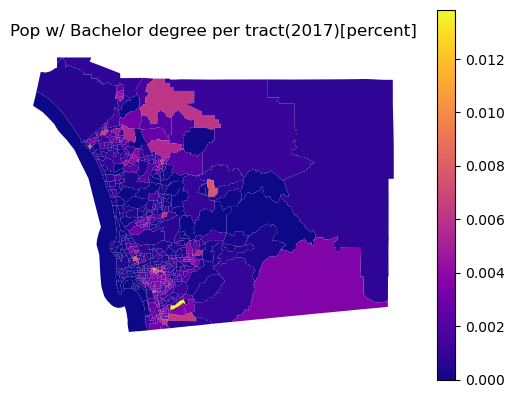

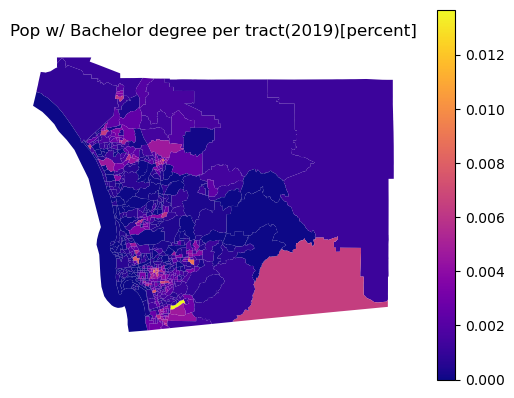

_________________________________________________________________________


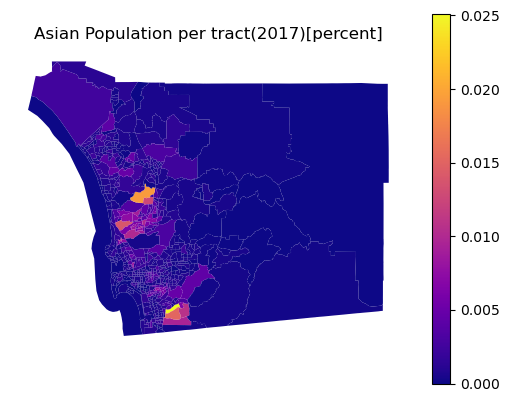

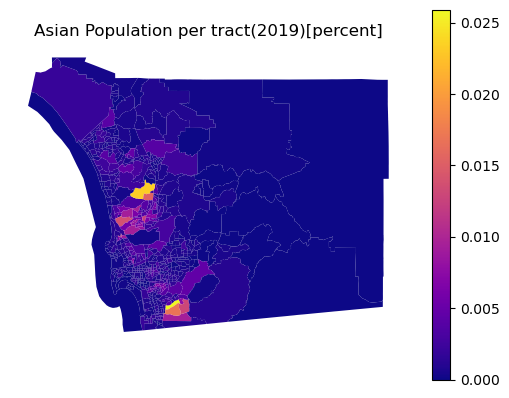

_________________________________________________________________________


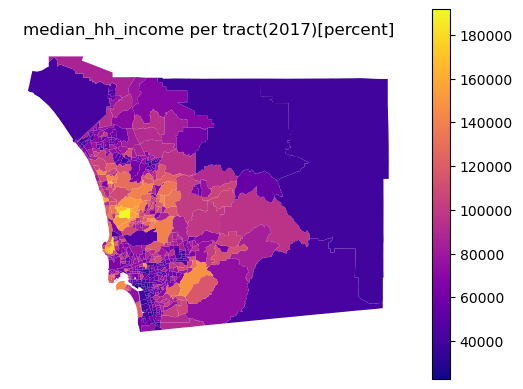

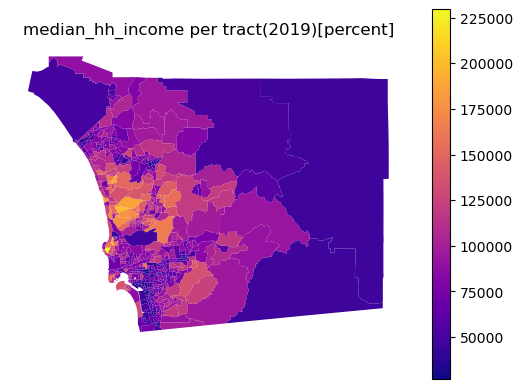

_________________________________________________________________________


In [343]:
for column in master_columns:
  to_plot = sd_2017_percents.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} per tract(2017)[percent]')
  plt.axis('off')
  plt.show()
  to_plot = sd_2019_percents.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} per tract(2019)[percent]')
  plt.axis('off')
  plt.show()
  print('_________________________________________________________________________')


In [308]:
#describe the percentage tables of the 2017 data
sd_2017_percents.describe()

Population  White Population  Black Population  Asian Population  \
count  628.000000        628.000000        628.000000        628.000000   
mean     0.001592          0.001592          0.001592          0.001592   
std      0.000878          0.000876          0.002172          0.002326   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.001122          0.001099          0.000322          0.000351   
50%      0.001468          0.001450          0.000905          0.000787   
75%      0.001894          0.001988          0.002061          0.001756   
max      0.012304          0.013096          0.025168          0.025105   

       Pop w/ Bachelor degree  median_hh_income    area_sqkm  
count              628.000000        621.000000   628.000000  
mean                 0.001592      75402.798712    18.664562  
std                  0.001774      30634.533896   137.353940  
min                  0.000000      22614.000000     0.254411  
25%                  0.000311      52656.000000     1.172083  
50%                  0.000981      69792.000000     2.033380  
75%                  0.002328      92656.000000     4.288706  
max                  0.013835     191642.000000  2759.220507

In [309]:
#describe the percentage tables of the 2019 data
sd_2019_percents.describe()

Population  White Population  Black Population  Asian Population  \
count  628.000000        628.000000        628.000000        628.000000   
mean     0.001592          0.001592          0.001592          0.001592   
std      0.000899          0.000877          0.002077          0.002424   
min      0.000000          0.000000          0.000000          0.000000   
25%      0.001117          0.001106          0.000352          0.000392   
50%      0.001472          0.001437          0.000864          0.000822   
75%      0.001887          0.001937          0.001969          0.001716   
max      0.011687          0.012479          0.021295          0.025885   

       Pop w/ Bachelor degree  median_hh_income    area_sqkm  
count              628.000000        621.000000   628.000000  
mean                 0.001592      83753.033816    18.665252  
std                  0.001738      33261.533699   137.356976  
min                  0.000000      27004.000000     0.254411  
25%                  0.000341      59643.000000     1.172082  
50%                  0.001017      79953.000000     2.033380  
75%                  0.002323     102118.000000     4.288691  
max                  0.013660     229583.000000  2759.220505

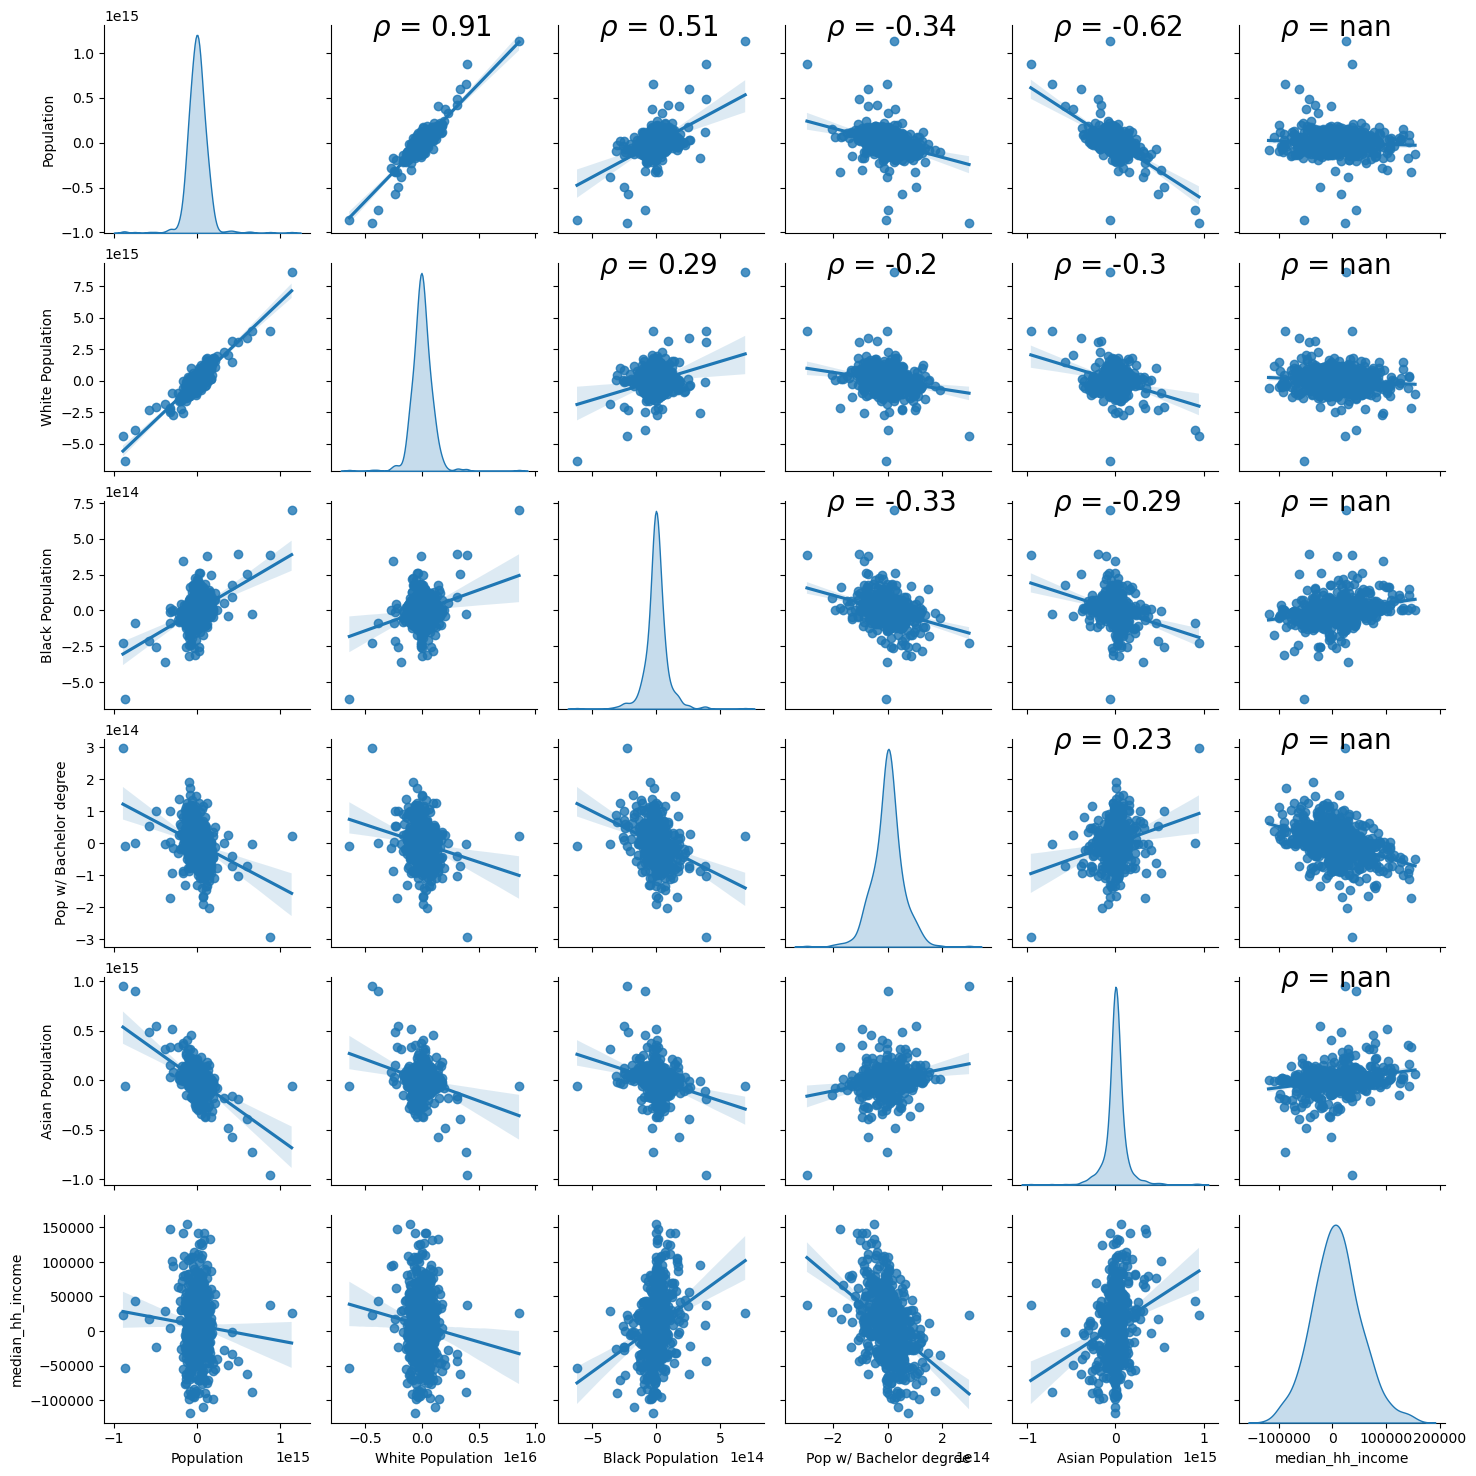

In [70]:
# Create probability density function graphs for each statistic. Will be using the non-percent tables

# for column in variables_dict.values():
#   #do something
cluster_matrix_2019 = san_diego_csa_renamed_2019[master_columns]
cluster_matrix_2017 = san_diego_csa_renamed_2017[master_columns]

#Create a function that allows us to visualize all the correlations and the pdf of the varaibles.
def corr(x, y, **kwargs):
  coef = np.corrcoef(x, y)[0][1]
  label = r'$\rho$ = ' + str(round(coef, 2))
  ax = plt.gca()
  ax.annotate(label, xy = (.2, .95), size = 20, xycoords = ax.transAxes)

grid = sns.pairplot(cluster_matrix_2019, kind = 'reg', diag_kind = 'kde')
grid = grid.map_upper(corr)
plt.show()

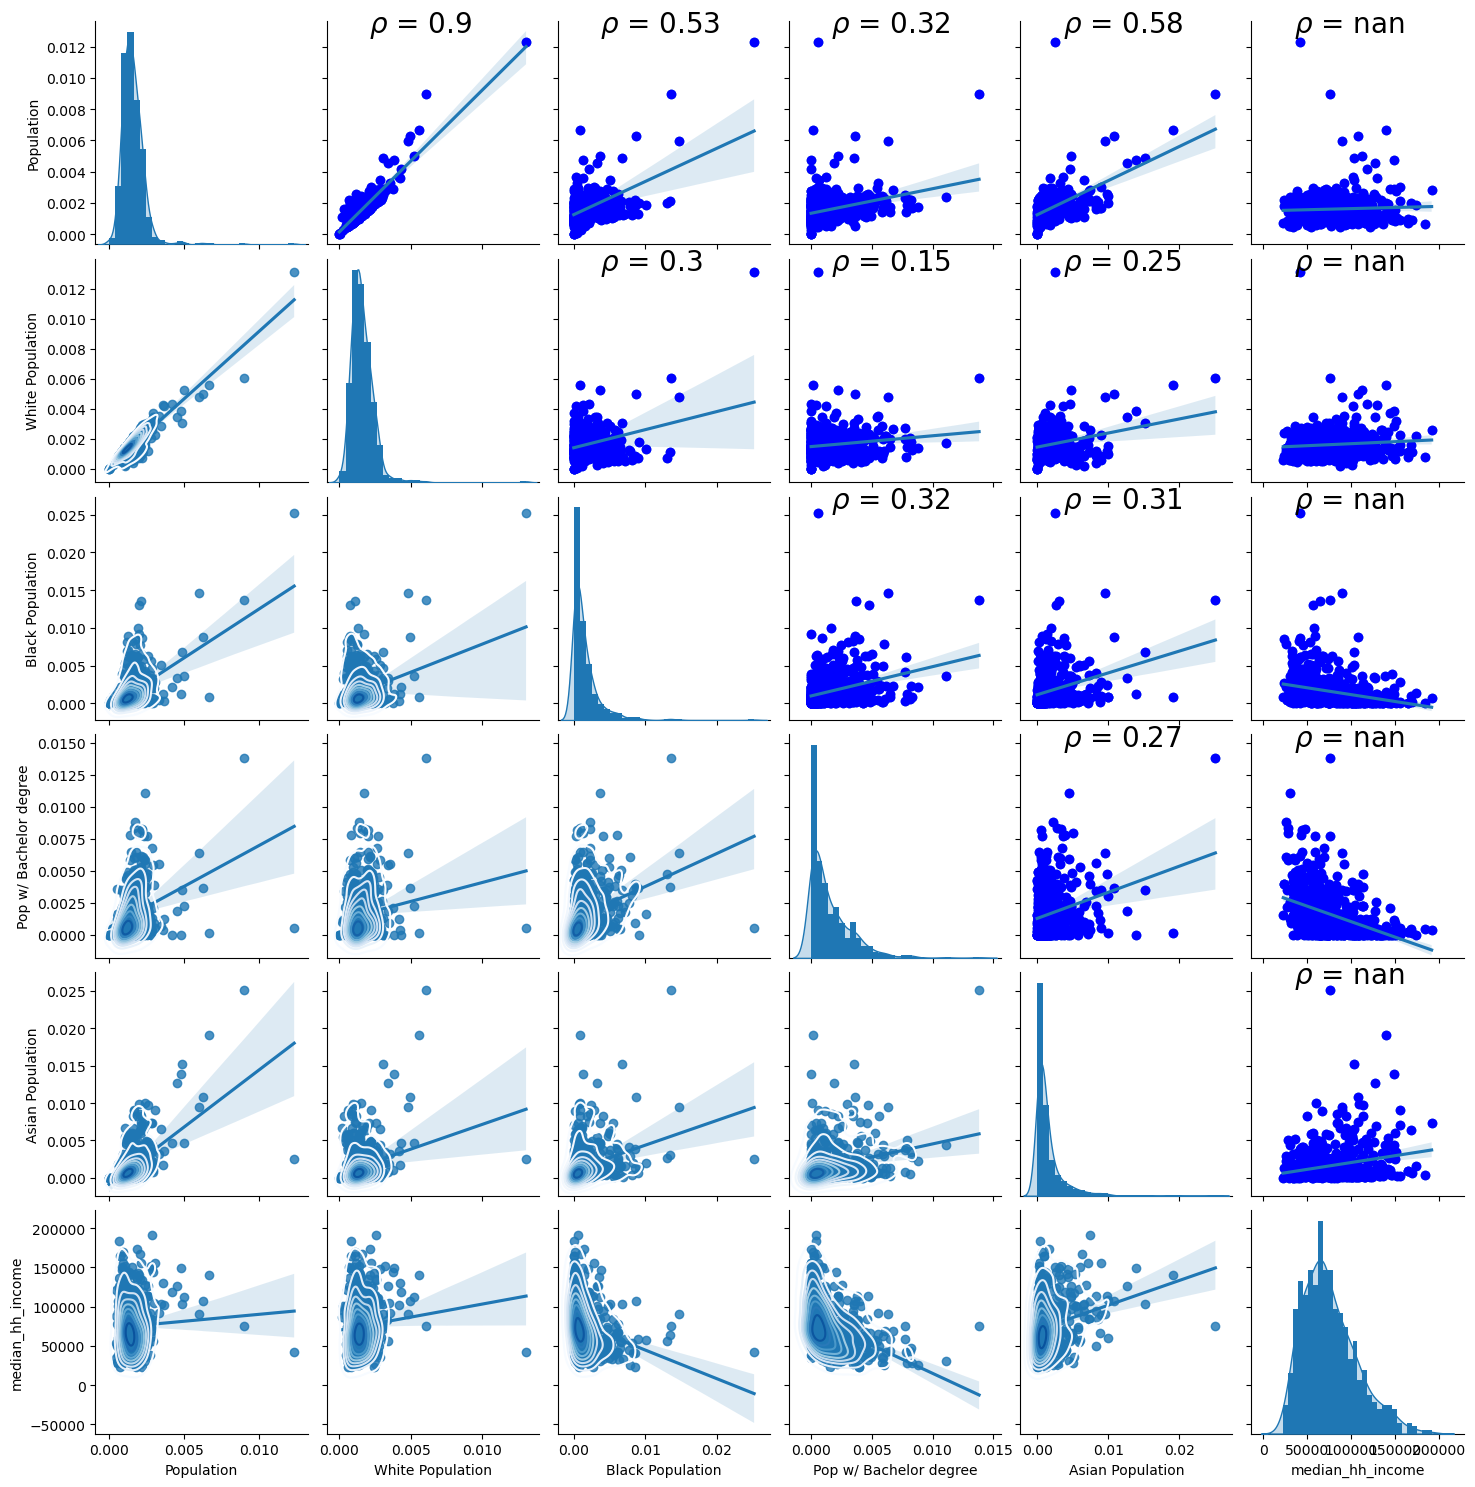

In [71]:
grid = sns.pairplot(cluster_matrix_2017, kind = 'reg', diag_kind = 'kde')
#grid = sns.PairGrid(cluster_matrix_2019)
grid = grid.map_upper(plt.scatter, color = 'blue')
grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
grid = grid.map_upper(corr)
grid = grid.map_diag(plt.hist, bins = 30, density = True)
#grid = grid.map_diag(sns.distplot, hist = True, kde = True)
plt.show()

#grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
#grid = grid.map_diag('kde')

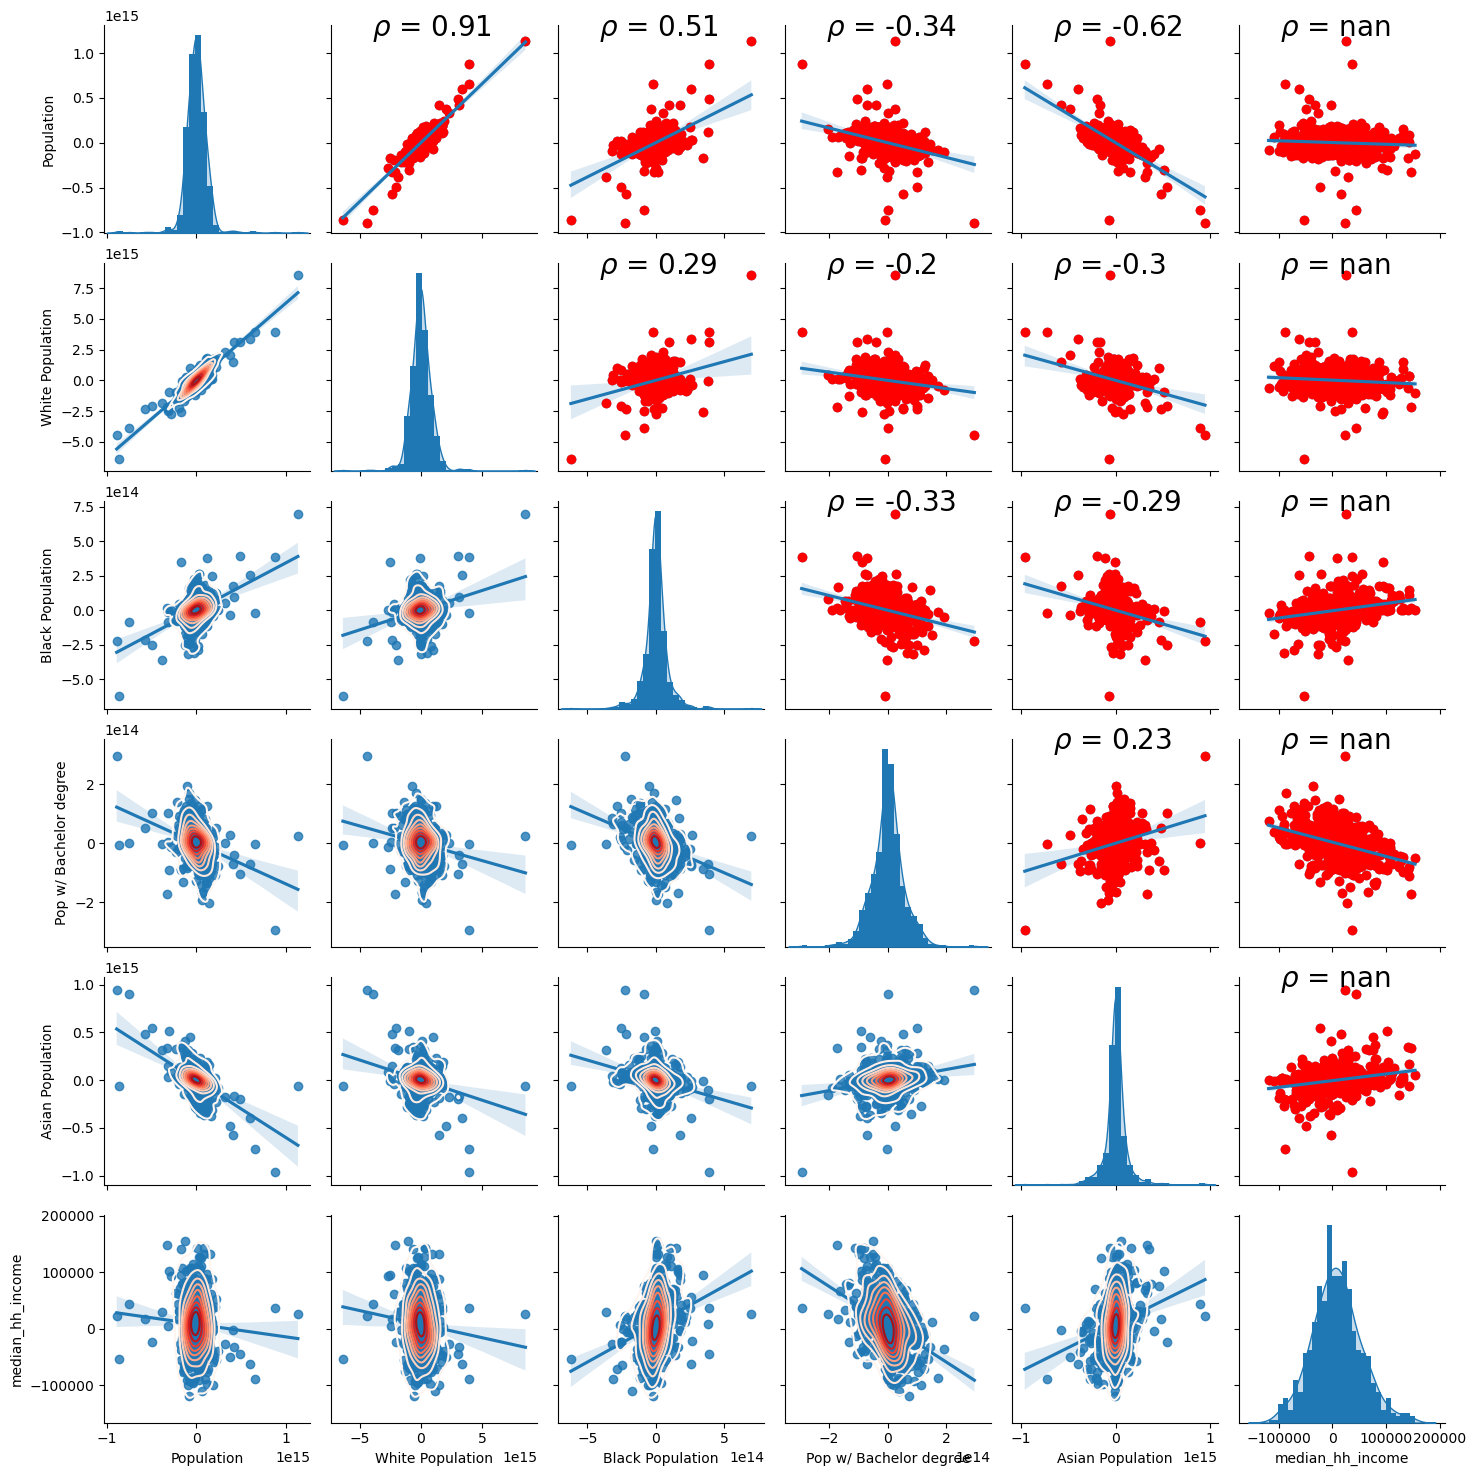

In [72]:

grid = sns.pairplot(cluster_matrix_2019, kind = 'reg', diag_kind = 'kde')
grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 30, density = True)
#grid = grid.map_lower(sns.kdeplot, cmap = 'Blues')
#grid = grid.map_diag('kde')
grid = grid.map_upper(corr)
plt.show()

In [76]:
def differences_table(df1, df2, columns):
  diff_df = df1.copy()
  diff_df.drop(columns = columns)
  for column in columns:
    diff_df[column] = df1[column] - df2[column]
  return diff_df

In [77]:
differences_df = differences_table(san_diego_csa_renamed_2019, san_diego_csa_renamed_2017, list(master_columns))

In [291]:
differences_df.head(5)

GEOID                                           geometry  \
430  06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
431  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
198  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   
433  06073000300  POLYGON ((-13043153.900 3862030.870, -13043127...   
348  06073000400  POLYGON ((-13043401.250 3863312.430, -13043325...   

       Population  White Population  Black Population  Asian Population  \
430  5.451902e+13      2.168975e+14      3.790219e+13     -4.178931e+13   
431  5.936114e+13      2.922867e+14      3.361451e+13     -3.571289e+13   
198  2.689289e+13      6.365817e+13      4.150420e+13      2.005851e+13   
433 -3.676998e+13     -6.850059e+14      4.728033e+13     -1.639371e+13   
348  4.791882e+13      2.625014e+14     -3.090027e+13     -6.159097e+13   

     Pop w/ Bachelor degree  median_hh_income  \
430           -1.411060e+14          -96761.0   
431           -3.124118e+13         -155323.0   
198           -7.706159e+13         -146466.0   
433            8.422170e+12         -152685.0   
348           -4.165491e+12         -423253.0   

                                                NAME state county   tract  \
430     Census Tract 1, San Diego County, California    06    073  000100   
431  Census Tract 2.01, San Diego County, California    06    073  000201   
198  Census Tract 2.02, San Diego County, California    06    073  000202   
433     Census Tract 3, San Diego County, California    06    073  000300   
348     Census Tract 4, San Diego County, California    06    073  000400   

     area_sqkm  pop1  white_pop1  black_pop1  bach_pop1  asian_pop1 hh_income1  
430   1.541456     1           1           1          0           0          0  
431   0.864208     1           1           1          0           0          0  
198   1.306002     1           1           1          0           1          0  
433   0.898762     0           0           1          1           0          0  
348   1.177452     1           1           0          0           0          0

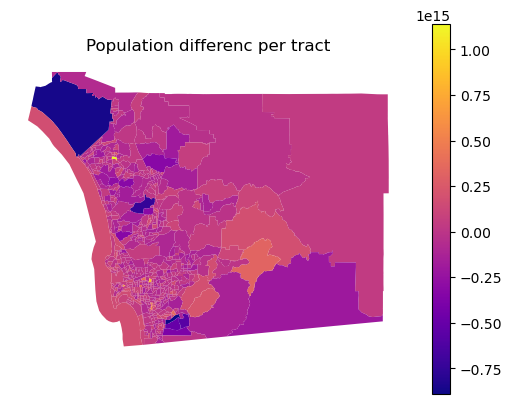

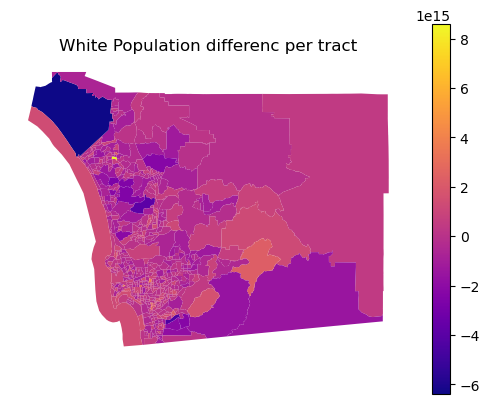

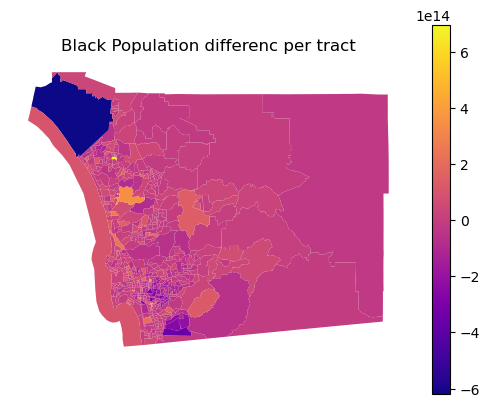

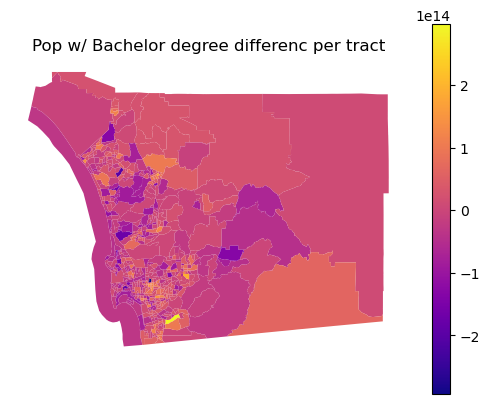

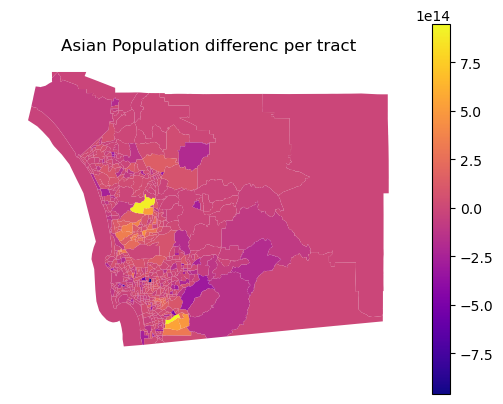

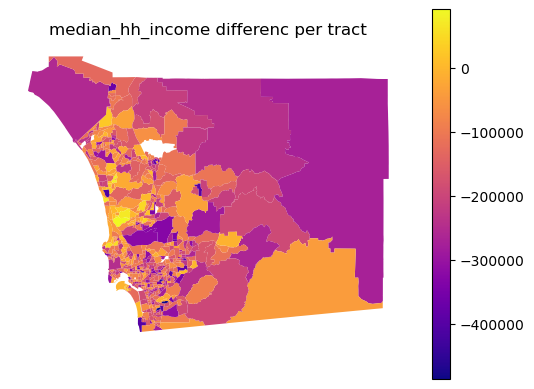

In [79]:
for column in master_columns:
  to_plot = differences_df.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'plasma', legend = True)
  plt.title(f'{column} differenc per tract')
  plt.axis('off')
  plt.show()

In [80]:
differences_df.describe()

Population  White Population  Black Population  Asian Population  \
count  6.280000e+02      6.280000e+02      6.280000e+02      6.280000e+02   
mean   4.478503e-04     -1.007166e-01      7.464172e-05     -9.205812e-04   
std    1.351920e+14      9.346846e+14      9.039734e+13      1.312024e+14   
min   -8.907330e+14     -6.391205e+15     -6.203739e+14     -9.599329e+14   
25%   -6.201354e+13     -4.650643e+14     -3.131884e+13     -3.387711e+13   
50%   -3.027816e+12     -1.859564e+13     -2.401661e+11      9.539877e+10   
75%    5.820923e+13      4.467397e+14      3.360571e+13      3.645995e+13   
max    1.137234e+15      8.572931e+15      6.977614e+14      9.464539e+14   

       Pop w/ Bachelor degree  median_hh_income    area_sqkm  
count            6.280000e+02        614.000000   628.000000  
mean            -2.935908e-03    -142870.949511    18.665252  
std              5.544856e+13      98376.319799   137.356976  
min             -2.939177e+14    -486509.000000     0.254411  
25%             -2.829964e+13    -202417.750000     1.172082  
50%              3.165939e+11    -128269.500000     2.033380  
75%              2.776171e+13     -73787.750000     4.288691  
max              2.971493e+14      91119.000000  2759.220505

In [81]:
###create a function that will take in a dataframe, look at each element of a desired column
###and return a 1 if the value increases and a 0 if the value decreases. Should also account for nan values and fill in nan
### want it to return a matrix so then I can add more columns to the df that will specify if each increases or decreases
###(amount wont matter for these)
def var_increase_decrease(df):
    matrix = []
    for column in master_columns:
        a_column = []
        for value in df[column]:
            if np.isnan(value):
                a_column.append('NaN')
            elif value < 0:
                a_column.append(0)
            else:
                a_column.append(1)
        matrix.append(a_column)
    return matrix


In [82]:
increase_decrease_matrix = var_increase_decrease(differences_df)
print('the size of increase or decrease is', np.shape(increase_decrease_matrix), 'and should be', (len(master_columns), len(differences_df['Population'])))

the size of increase or decrease is (6, 628) and should be (6, 628)


In [83]:
print(master_columns)

dict_values(['Population', 'White Population', 'Black Population', 'Pop w/ Bachelor degree', 'Asian Population', 'median_hh_income'])


In [86]:
new_columns = ['pop1' , 'white_pop1', 'black_pop1', 'bach_pop1', 'asian_pop1', 'hh_income1']
extras_differences_df = differences_df.copy()
for i in range(6):
    extras_differences_df[new_columns[i]] = increase_decrease_matrix[i]
    

In [216]:
extras_differences_df.head(3)

GEOID                                           geometry  \
430  06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
431  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
198  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   

       Population  White Population  Black Population  Asian Population  \
430  5.451902e+13      2.168975e+14      3.790219e+13     -4.178931e+13   
431  5.936114e+13      2.922867e+14      3.361451e+13     -3.571289e+13   
198  2.689289e+13      6.365817e+13      4.150420e+13      2.005851e+13   

     Pop w/ Bachelor degree  median_hh_income  \
430           -1.411060e+14          -37851.0   
431           -3.124118e+13          -94461.0   
198           -7.706159e+13          -90685.0   

                                                NAME state county   tract  \
430     Census Tract 1, San Diego County, California    06    073  000100   
431  Census Tract 2.01, San Diego County, California    06    073  000201   
198  Census Tract 2.02, San Diego County, California    06    073  000202   

     area_sqkm  pop1  white_pop1  black_pop1  bach_pop1  asian_pop1 hh_income1  
430   1.541456     1           1           1          0           0          0  
431   0.864208     1           1           1          0           0          0  
198   1.306002     1           1           1          0           1          0

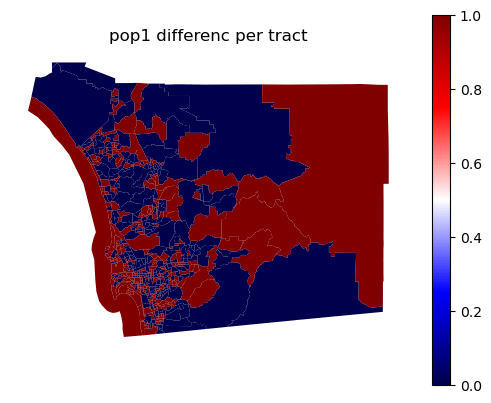

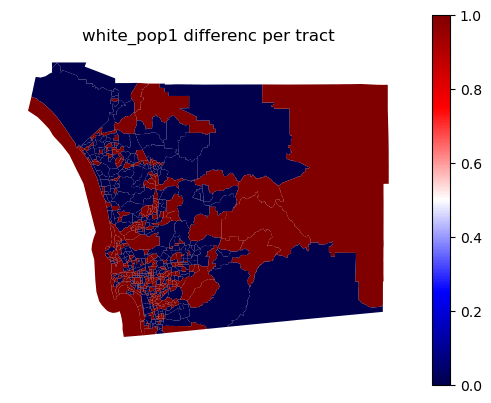

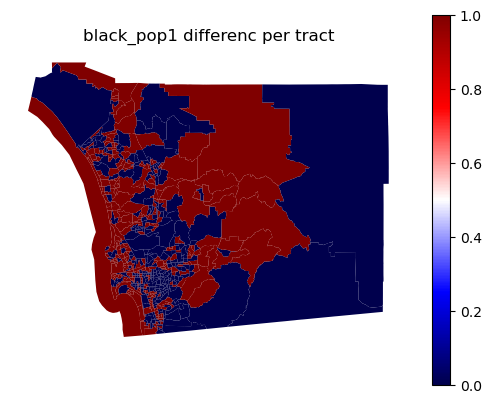

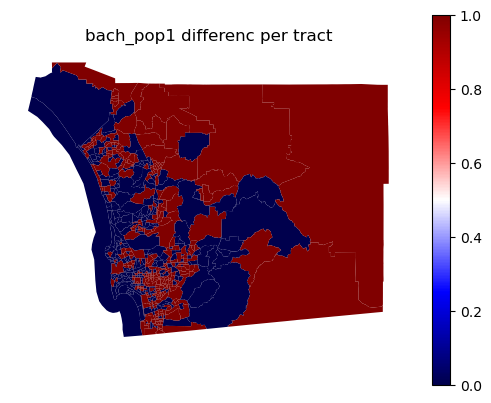

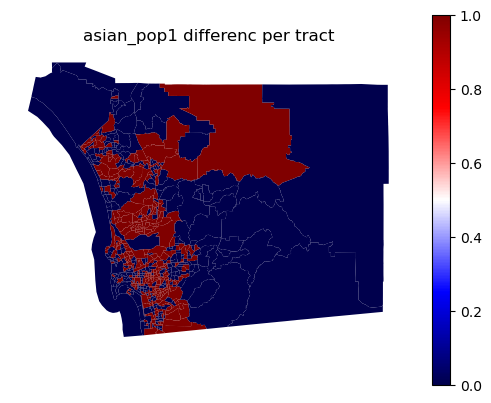

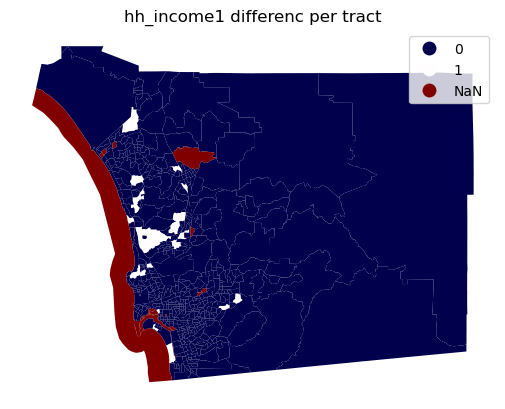

In [91]:
### create plots based on the increase or decrease values
for column in new_columns:
  to_plot = extras_differences_df.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'seismic', legend = True)
  plt.title(f'{column} differenc per tract')
  plt.axis('off')
  plt.show()

In [ ]:
###Now I will begin to do clustering, 
##I think I will first do 2 clusters based on the data that tells if it decreased or increased
## then I will do like 5 clusters with the difference values and see how they are categorized
##for the two clusters I will have to just create a bar plot with values at 1 or 0 to see how they are arranged
## for the 5 clusters I will be able to use pdf to see how the values are arranged
## Lets give it a go!

In [329]:
df_clustering = extras_differences_df.copy()
df_clustering2 = df_clustering.dropna().copy()
df_clustering5 = df_clustering.dropna().copy()
kmeans2 = KMeans(n_clusters = 2)
kmeans2.fit(df_to_cluster[new_columns])
kmeans5 = KMeans(n_clusters = 5)
kmeans5.fit(df_to_cluster5[master_columns])

KMeans(n_clusters=5)

In [225]:
# kmeans2 = KMeans(n_clusters = 2)
# df_to_cluster2 = extras_differences_df[extras_differences_df[new_columns] != 'NaN']
# #print(df_to_cluster2)
# np.random.seed(1234)
# df_to_cluster2 = df_to_cluster2[new_columns].dropna()
# kmeans2.fit(df_to_cluster2[new_columns].dropna())

In [226]:
# kmeans5 = KMeans(n_clusters = 5)
# df_to_cluster5 = extras_differences_df[extras_differences_df[master_columns] != 'NaN']
# df_to_cluster5 = df_to_cluster5[master_columns].dropna()
# kmeans5.fit(df_to_cluster5[master_columns])

In [238]:
labels2 = kmeans2.labels_
labels5 = kmeans5.labels_
df_clustering2['KMeans2 label'] = labels2
df_clustering5['KMeans5 label'] = labels5

C:\Users\Tyler Marino\Documents\anaconda\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Tyler Marino\Documents\anaconda\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
f, ax = plt.subplots(1, figsize=(9,9))
df_to_cluster.plot(column='KMeans2 label', categorical = True, legend = True, linewidth = 0, ax = ax)
ax.set_axis_off()
plt.show()

In [ ]:
f, ax = plt.subplots(1, figsize=(9,9))
df_to_cluster5.plot('KMeans5 label', categorical = True, legend = True, linewidth = 0, ax = ax)
ax.set_axis_off()
plt.show()

In [239]:
sizes2 = df_clustering2.groupby('KMeans2 label').size()
sizes5 = df_clustering5.groupby('KMeans5 label').size()
print('sizes of 2 kmeans clustering is', sizes2)
print('sizes of the 5 kmeans clustering is', sizes5)

sizes of 2 kmeans clustering is KMeans2 label
0    317
1    297
dtype: int64
sizes of the 5 kmeans clustering is KMeans5 label
0      6
1    158
2    305
3     10
4    135
dtype: int64


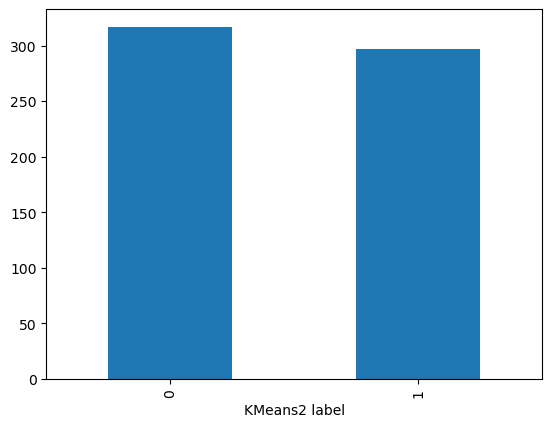

In [240]:
_ = sizes2.plot.bar()

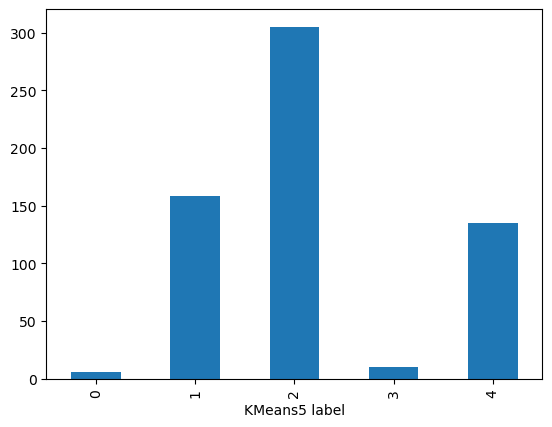

In [241]:
_ = sizes5.plot.bar()

In [245]:
areas2 = df_clustering2.groupby('KMeans2 label').sum()['area_sqkm']
areas5 = df_clustering5.groupby('KMeans5 label').sum()['area_sqkm']

In [247]:
print('the areas for the respective 0 and 1 clusters are,', areas2)

the areas for the respective 0 and 1 clusters are, KMeans2 label
0    5843.279997
1    5110.359377
Name: area_sqkm, dtype: float64


In [248]:
print('the areas for the respective 0 - 4 clusters are,', areas5)

the areas for the respective 0 - 4 clusters are, KMeans5 label
0       5.795624
1    2953.529227
2    5690.181781
3     731.899087
4    1572.233656
Name: area_sqkm, dtype: float64


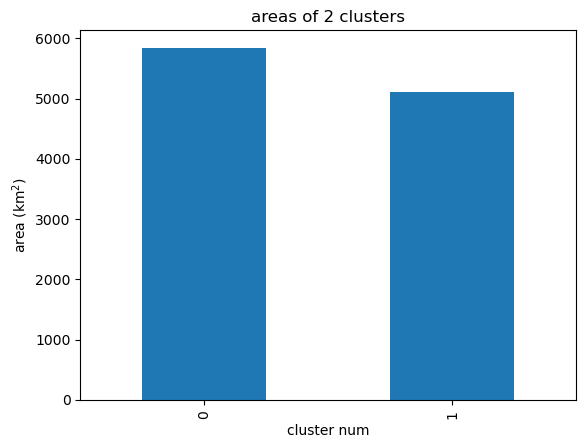

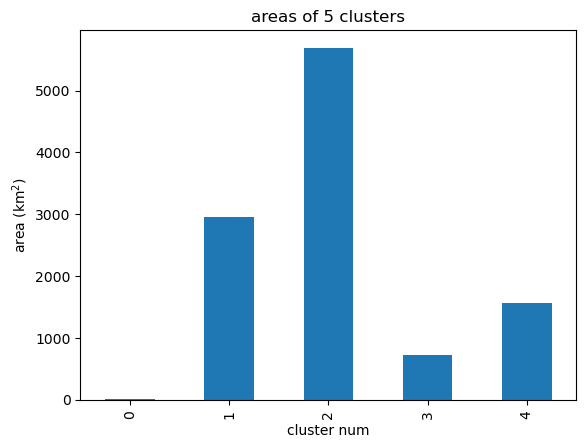

In [250]:
areas2.plot.bar()
plt.title('areas of 2 clusters')
plt.xlabel('cluster num')
plt.ylabel('area ($\mathregular{km^{2}}$)')
plt.show()
areas5.plot.bar()
plt.title('areas of 5 clusters')
plt.xlabel('cluster num')
plt.ylabel('area ($\mathregular{km^{2}}$)')
plt.show()

In [261]:
print('note these are the differences so the values will not be as informative  upon first observations')
k2means = df_clustering2.groupby('KMeans2 label').mean()
k2means.T

note these are the differences so the values will not be as informative  upon first observations


KMeans2 label                      0             1
Population             -7.936293e+13  8.522478e+13
White Population       -5.098874e+14  5.460192e+14
Black Population       -2.455312e+13  2.635532e+13
Asian Population        4.416317e+13 -4.742004e+13
Pop w/ Bachelor degree  1.567430e+13 -1.668116e+13
median_hh_income       -1.437003e+05 -1.419858e+05
area_sqkm               1.843306e+01  1.720660e+01
pop1                    6.309148e-03  1.000000e+00
white_pop1              1.735016e-01  8.181818e-01
black_pop1              3.627760e-01  6.296296e-01
bach_pop1               6.025237e-01  4.276094e-01
asian_pop1              6.813880e-01  3.097643e-01

In [260]:
print('note these are the differences so the values will not be as informative  upon first observations')
k5means = df_clustering5.groupby('KMeans5 label').mean()
k5means.T.round(1)

note these are the differences so the values will not be as informative  upon first observations


KMeans5 label                      0             1             2  \
Population              6.988543e+14 -8.700740e+13  1.303952e+12   
White Population        4.328984e+15 -8.137839e+14  2.172530e+13   
Black Population        3.009460e+14  3.226990e+11 -7.296531e+11   
Asian Population       -4.166372e+14  6.629426e+11  1.968361e+12   
Pop w/ Bachelor degree -8.101573e+13  1.295915e+13 -1.124684e+12   
median_hh_income       -2.163652e+05 -1.415725e+05 -1.360436e+05   
area_sqkm               1.000000e+00  1.870000e+01  1.870000e+01   
pop1                    1.000000e+00  1.000000e-01  5.000000e-01   
white_pop1              1.000000e+00  0.000000e+00  5.000000e-01   
black_pop1              8.000000e-01  5.000000e-01  5.000000e-01   
bach_pop1               2.000000e-01  6.000000e-01  5.000000e-01   
asian_pop1              0.000000e+00  6.000000e-01  5.000000e-01   

KMeans5 label                      3             4  
Population             -4.881000e+14  1.051189e+14  
White Population       -3.124736e+15  9.463591e+14  
Black Population       -1.077105e+14 -3.798684e+12  
Asian Population        3.204160e+14 -1.106267e+13  
Pop w/ Bachelor degree  2.308858e+13 -1.062860e+13  
median_hh_income       -1.315034e+05 -1.573910e+05  
area_sqkm               7.320000e+01  1.160000e+01  
pop1                    0.000000e+00  1.000000e+00  
white_pop1              0.000000e+00  1.000000e+00  
black_pop1              4.000000e-01  5.000000e-01  
bach_pop1               6.000000e-01  5.000000e-01  
asian_pop1              7.000000e-01  4.000000e-01

In [288]:
tidy2 = df_clustering2.set_index('KMeans2 label')
tidy2 = tidy2[new_columns]
tidy2 = tidy2.stack()
tidy2 = tidy2.reset_index()
tidy2 = tidy2.rename(columns = {'level_1': 'Attributes', 0: 'Values'})
tidy2.groupby(['KMeans2 label', 'Attributes']).count()

Values
KMeans2 label Attributes        
0             asian_pop1     317
              bach_pop1      317
              black_pop1     317
              hh_income1     317
              pop1           317
              white_pop1     317
1             asian_pop1     297
              bach_pop1      297
              black_pop1     297
              hh_income1     297
              pop1           297
              white_pop1     297

In [277]:
tidy5 = df_clustering5.set_index('KMeans5 label')
tidy5 = tidy5[master_columns]
tidy5 = tidy5.stack()
tidy5 = tidy5.reset_index()
tidy5 = tidy5.rename(columns = {'level_1': 'Attributes', 0: 'Values'})
tidy5

KMeans5 label              Attributes        Values
0                 2              Population  5.451902e+13
1                 2        White Population  2.168975e+14
2                 2        Black Population  3.790219e+13
3                 2  Pop w/ Bachelor degree -1.411060e+14
4                 2        Asian Population -4.178931e+13
...             ...                     ...           ...
3679              1        White Population -1.637878e+15
3680              1        Black Population -1.810518e+12
3681              1  Pop w/ Bachelor degree  9.170645e+13
3682              1        Asian Population  5.841344e+13
3683              1        median_hh_income -1.162150e+05

[3684 rows x 3 columns]

In [ ]:
facets = sns.FacetGrid(data = tidy2, col = 'Attributes', hue = 'KMeans2 label', sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.barplot, 'Values', shade = True).add_legend()
plt.show()

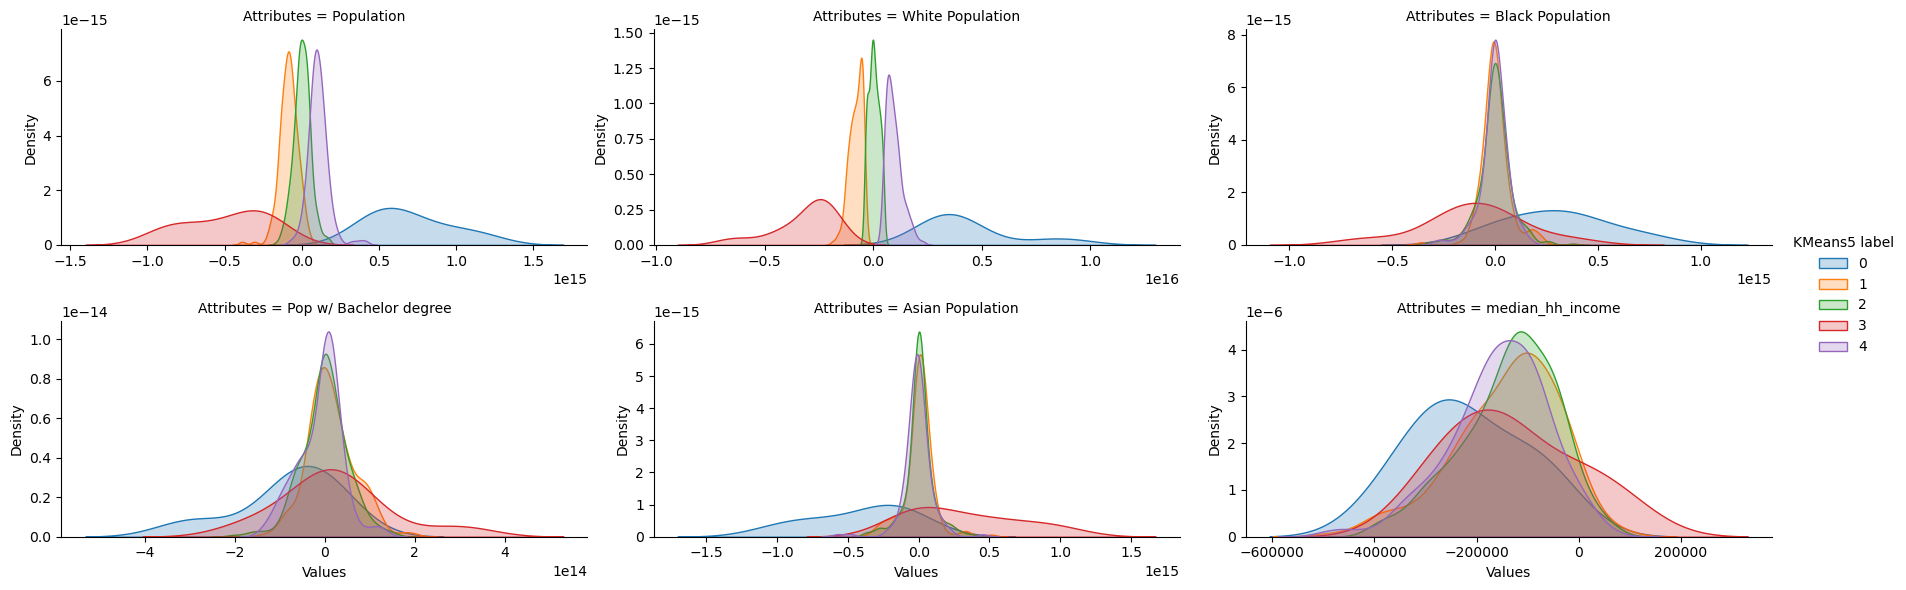

In [289]:
facets = sns.FacetGrid(data = tidy5, col = 'Attributes', hue = 'KMeans5 label', sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.kdeplot, 'Values', shade = True).add_legend()
plt.show()

## Now I will start over with the clustering but use the data with respect to percentage differences (2019-2017)

In [436]:
import sklearn
from sklearn.cluster import KMeans, DBSCAN


In [311]:
percent_differences_df = differences_table(sd_2019_percents, sd_2017_percents, master_columns)
percent_differences_df.head(3)

GEOID                                           geometry  \
430  06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
431  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
198  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   

     Population  White Population  Black Population  Asian Population  \
430   -0.001949         -0.001761         -0.002564         -0.002463   
431   -0.001677         -0.001468         -0.002334         -0.002033   
198   -0.001871         -0.001826         -0.002832          0.000075   

     Pop w/ Bachelor degree  median_hh_income  \
430               -0.012973           21059.0   
431               -0.002872          -33599.0   
198               -0.007085          -34904.0   

                                                NAME state county   tract  \
430     Census Tract 1, San Diego County, California    06    073  000100   
431  Census Tract 2.01, San Diego County, California    06    073  000201   
198  Census Tract 2.02, San Diego County, California    06    073  000202   

     area_sqkm  
430   1.541456  
431   0.864208  
198   1.306002

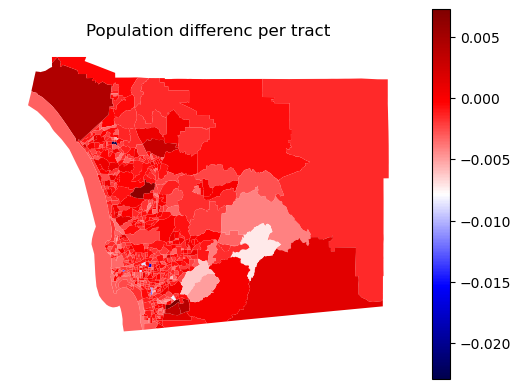

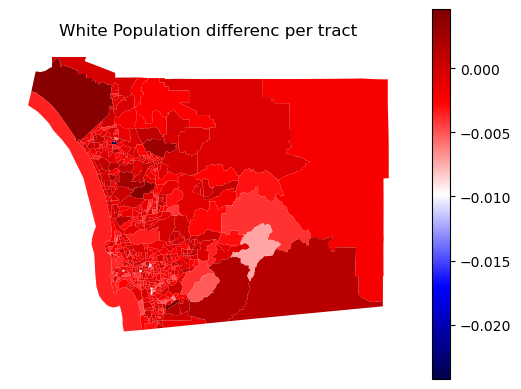

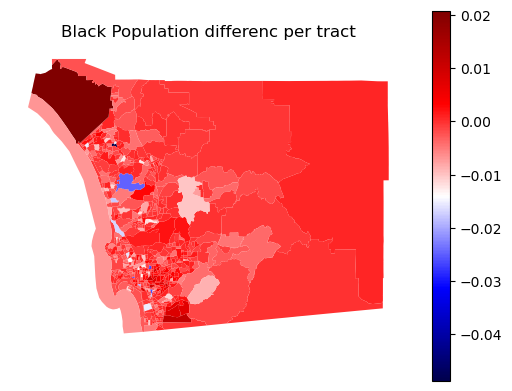

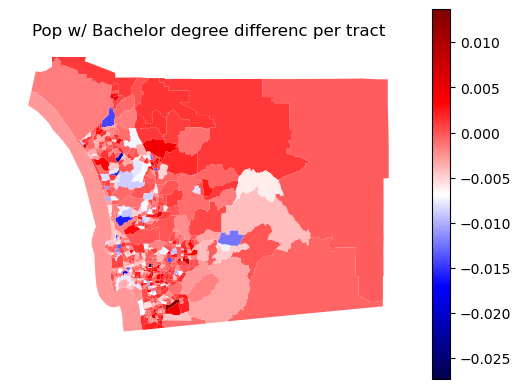

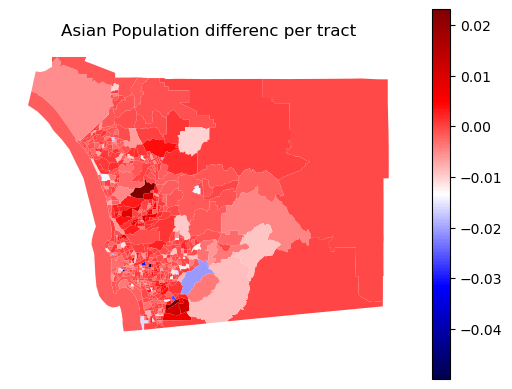

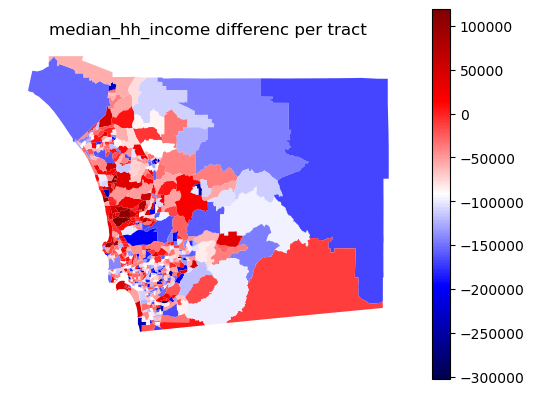

In [314]:
### create plots based on the increase or decrease values
for column in master_columns:
  to_plot = percent_differences_df.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'seismic', legend = True)
  plt.title(f'{column} differenc per tract')
  plt.axis('off')
  plt.show()

Notice that most percentages changes close to or above 0 except for median household income which has a decent amount of decrease in housing cost. Bachelors degree percentage also drops a bit.

Now I will add the 1 or 0 correspoding to an increased percentage or decreased percentage from 2019 to 2017

In [345]:
inc_dec_matrix_percent = var_increase_decrease(percent_differences_df)

In [346]:
np.shape(inc_dec_matrix_percent)

(6, 628)

In [347]:
new_columns = ['pop1' , 'white_pop1', 'black_pop1', 'bach_pop1', 'asian_pop1', 'hh_income1']
extras_percents_differences_df = percent_differences_df
for i in range(6):
    extras_percents_differences_df[new_columns[i]] = inc_dec_matrix_percent[i]
    

In [355]:
extras_percents_differences_df.head(3)

GEOID                                           geometry  \
430  06073000100  POLYGON ((-13046077.040 3862535.430, -13046055...   
431  06073000201  POLYGON ((-13044291.810 3863180.060, -13044191...   
198  06073000202  POLYGON ((-13044868.000 3861599.660, -13044843...   

     Population  White Population  Black Population  Asian Population  \
430   -0.001949         -0.001761         -0.002564         -0.002463   
431   -0.001677         -0.001468         -0.002334         -0.002033   
198   -0.001871         -0.001826         -0.002832          0.000075   

     Pop w/ Bachelor degree  median_hh_income  \
430               -0.012973           21059.0   
431               -0.002872          -33599.0   
198               -0.007085          -34904.0   

                                                NAME state county   tract  \
430     Census Tract 1, San Diego County, California    06    073  000100   
431  Census Tract 2.01, San Diego County, California    06    073  000201   
198  Census Tract 2.02, San Diego County, California    06    073  000202   

     area_sqkm  pop1  white_pop1  black_pop1  bach_pop1  asian_pop1 hh_income1  
430   1.541456     0           0           0          0           0          1  
431   0.864208     0           0           0          0           0          0  
198   1.306002     0           0           0          0           1          0

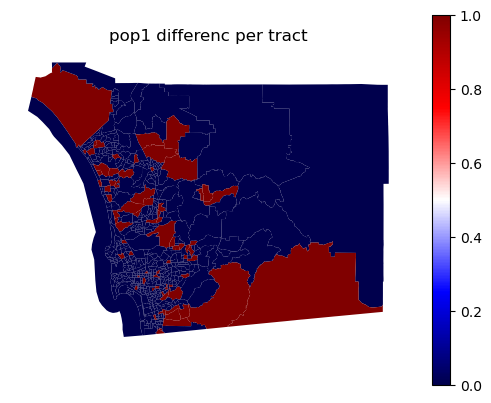

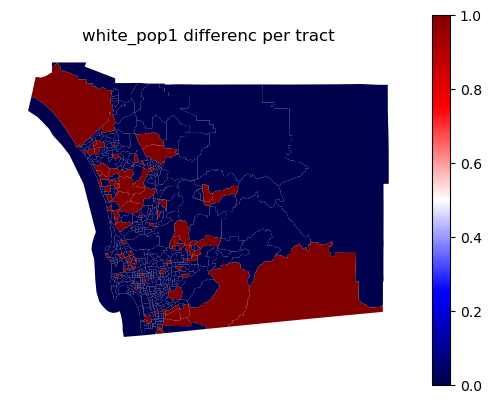

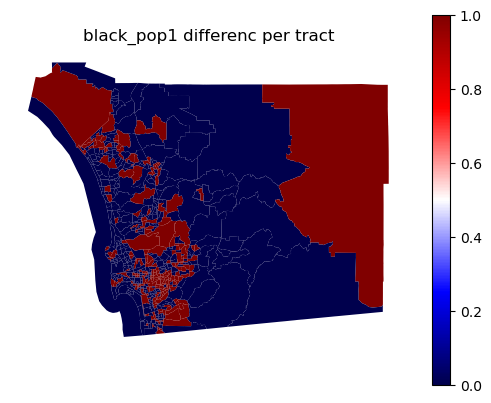

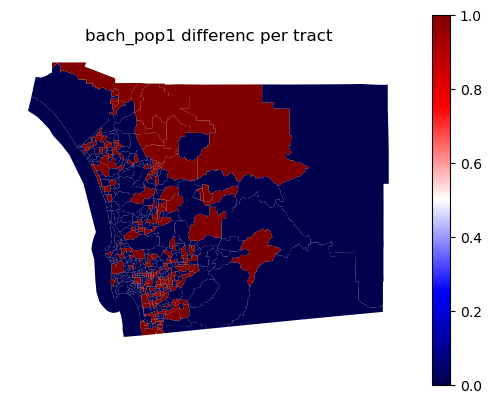

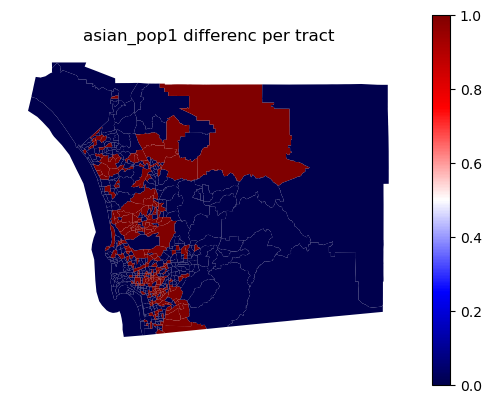

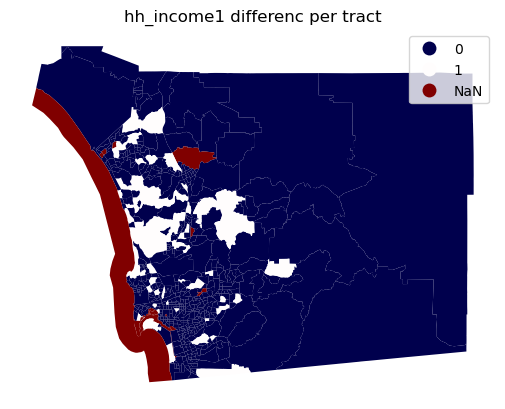

In [490]:
### create plots based on the increase or decrease values
for column in new_columns:
  to_plot = extras_percents_differences_df.dropna(subset = [column], axis = 0)
  to_plot.plot(column, cmap = 'seismic', legend = True)
  plt.title(f'{column} differenc per tract')
  plt.axis('off')
  plt.show()

So what does this mean: This means that the percent increases when the color is red/white(value 1) and decreases when color is blue(value0). Percent increase means that over the course of two years, there is a greater percent of the specific population in each tract than in 2017. For the HouseHold income, the 1 represent increase in housing income, the blue means theat people are making less than in 2017. 

It would be interesting to see where the household income of those that increased stood(did the rich get richer? and who are the rich? Did increase of bachelors increase hh_income?)

Maybe it would be interesting to compare a cluster of 2017 percents with the cluster of the percent differences??

Update: not a thing to compare clusters | not a thing to weight certain variables in clustering algorithm(KMeans specifically)

Update: Use K-Means to create associated groups that then you could run a regression algorithm on.



In [388]:
#Check the total number of tracts whose median hh income increased over time based on percent (sum hh_income1)
increased_income = sum(extras_percents_differences_df.dropna()['hh_income1'])
total_tracts = len(extras_percents_differences_df.dropna()['hh_income1'])

print('number of increased tracts is:', increased_income)
print('number of total tract in our pool is:', total_tracts)

number of increased tracts is: 97
number of total tract in our pool is: 614


In [370]:
### create a dataframe that has the total median hh income in 2017 on top of extras_percents_differences_df
check_on_wealth_df = pd.merge(extras_percents_differences_df, san_diego_csa_renamed_2017[['tract', 'median_hh_income']], on='tract')
check_on_wealth_df = check_on_wealth_df[['hh_income1', 'median_hh_income_y']]
check_on_wealth_df = check_on_wealth_df.sort_values('median_hh_income_y', ascending = False)
check_on_wealth_df = check_on_wealth_df.dropna()

In [478]:
### out of the first 40 tracts with the most income, 
check_on_wealth_df = check_on_wealth_df.dropna()
check_on_wealth_df = check_on_wealth_df[check_on_wealth_df['hh_income1'] != 'NaN']
print('the out of the top half of tracts, the amount that had an increase in the meadian hh income:', sum(check_on_wealth_df.head(307)['hh_income1']))
print('the out of the top 88 of tracts, the amount that had an increase in the meadian hh income:', sum(check_on_wealth_df.head(88)['hh_income1']))

the out of the top half of tracts, the amount that had an increase in the meadian hh income: 91
the out of the top 88 of tracts, the amount that had an increase in the meadian hh income: 48


Note that the top 1/2 of the tracts contain nearly all of the tracts thats median house hold income increased! and out of the top 80 percent there was an increase in 47 of the tracts median hh income. Rich getting richer it seems

In [373]:
check_on_wealth_df.tail(30)

hh_income1  median_hh_income_y
580          0             34259.0
298          0             34205.0
87           0             34199.0
105          0             34048.0
36           0             33965.0
96           0             33797.0
97           0             33420.0
349          0             33090.0
23           0             32946.0
28           0             32742.0
81           0             32475.0
38           0             32061.0
376          0             31979.0
581          0             31735.0
86           0             30845.0
586          0             30292.0
26           0             30231.0
281          0             29886.0
25           0             29741.0
95           0             28661.0
74           0             28483.0
31           0             28422.0
272          0             28036.0
296          0             26679.0
286          0             26382.0
37           0             26052.0
24           0             25625.0
374          0             23728.0
76           0             23452.0
98           0             22614.0

In [443]:
df_for_clustering = extras_percents_differences_df.copy()
df_for_clustering = df_for_clustering.dropna()
df_for_clustering = df_for_clustering[df_for_clustering != 'NaN']
inertia_scores = []
silhouette_scores = []
for size in range(1, 11):
    kmeans = KMeans(n_clusters = size)
    kmeans.fit(df_for_clustering[master_columns])
    labels = kmeans.labels_
    inertia_scores.append(kmeans.inertia_)
    #silhouette_scores.append(sklearn.metrics.silhouette_score(df_for_clustering[master_columns], labels))

C:\Users\Tyler Marino\Documents\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


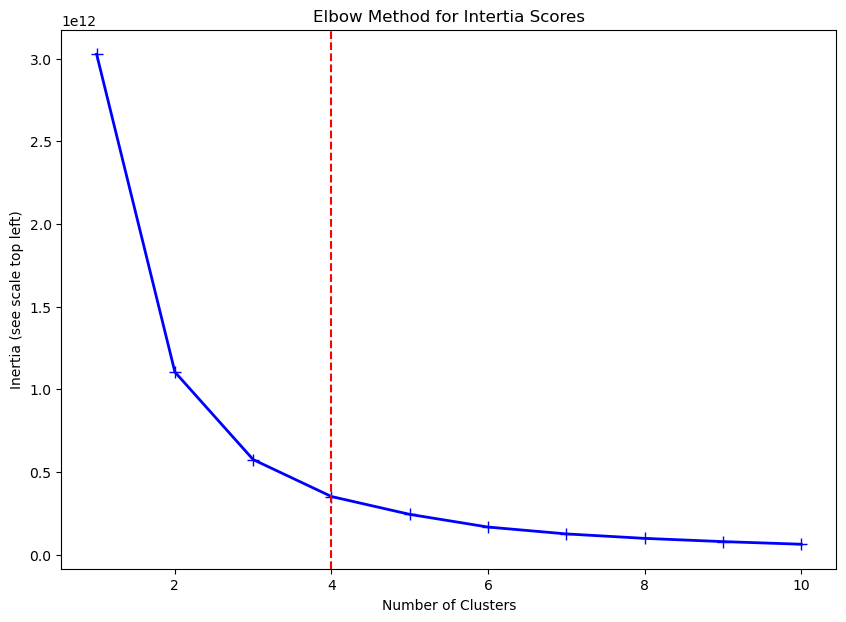

In [448]:
_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,11), inertia_scores, linewidth = 2, color = 'blue', marker = '+', markersize = 8)
_ = plt.title('Elbow Method for Intertia Scores')
_ = plt.xlabel('Number of Clusters')
_ = plt.ylabel('Inertia (see scale top left)')

num_clusters = 4

_ = plt.axvline(x = num_clusters, color = 'red', linestyle = '--')
_ = plt.show()

### Now I will need to conduct clustering for the 3 and 4 labels and plot the locations and plot the pdf graphs 

In [456]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(df_for_clustering[master_columns])
labels3 = kmeans3.labels_

kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(df_for_clustering[master_columns])
labels4 = kmeans4.labels_

In [457]:
df_for_clustering['labels4'] = labels4
df_for_clustering['labels3'] = labels3

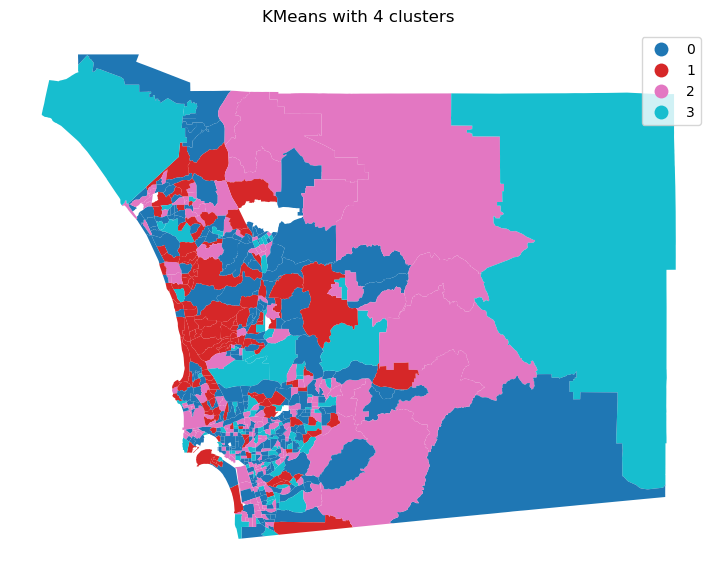

In [460]:
f, ax = plt.subplots(1, figsize=(9,9))
df_for_clustering.plot('labels4', categorical = True, legend = True, linewidth = 0, ax = ax)
plt.title('KMeans with 4 clusters')
ax.set_axis_off()
plt.show()

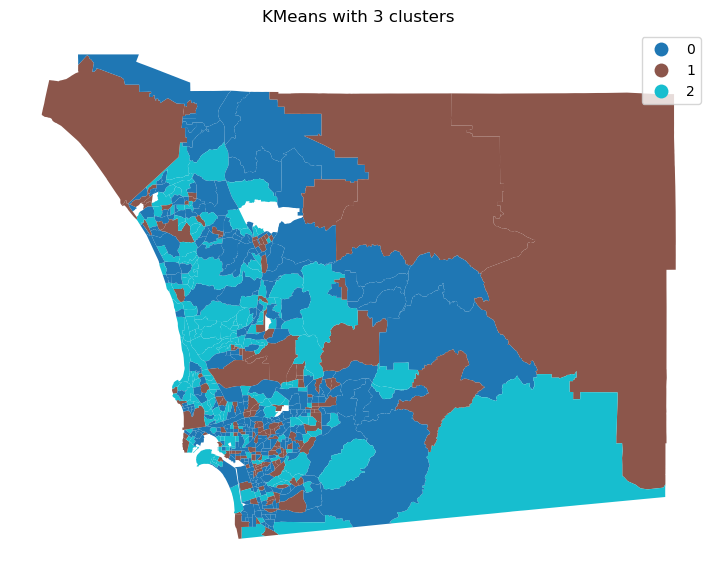

In [461]:
f, ax = plt.subplots(1, figsize=(9,9))
df_for_clustering.plot('labels3', categorical = True, legend = True, linewidth = 0, ax = ax)
plt.title('KMeans with 3 clusters')
ax.set_axis_off()
plt.show()

In [462]:
sizes3 = df_for_clustering.groupby('labels3').size()
sizes4 = df_for_clustering.groupby('labels4').size()
print('sizes of 2 kmeans clustering is', sizes3)
print('sizes of the 5 kmeans clustering is', sizes4)

sizes of 2 kmeans clustering is labels3
0    290
1    135
2    189
dtype: int64
sizes of the 5 kmeans clustering is labels4
0    236
1    127
2    172
3     79
dtype: int64


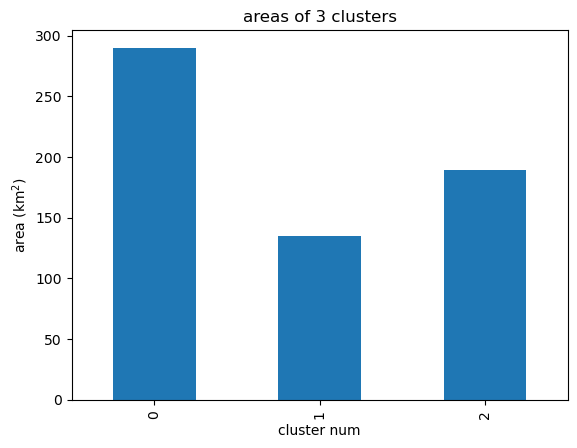

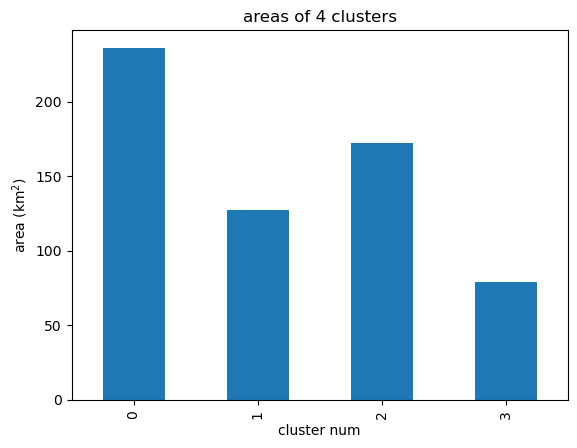

In [464]:
sizes3.plot.bar()
plt.title('areas of 3 clusters')
plt.xlabel('cluster num')
plt.ylabel('area ($\mathregular{km^{2}}$)')
plt.show()
sizes4.plot.bar()
plt.title('areas of 4 clusters')
plt.xlabel('cluster num')
plt.ylabel('area ($\mathregular{km^{2}}$)')
plt.show()

Lets chech the areas for these spots

In [484]:
areas3 = df_for_clustering.dissolve(by = 'labels3', aggfunc = 'sum')['area_sqkm']
areas3

labels3
0    3119.826470
1    5455.630702
2    2378.182202
Name: area_sqkm, dtype: float64

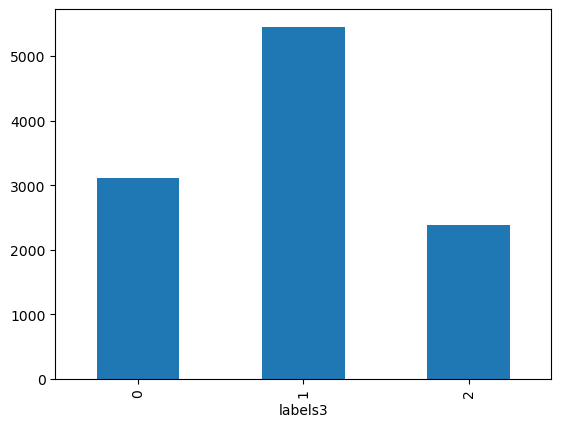

In [486]:
areas3.plot.bar()
plt.show()

In [487]:
areas4 = df_for_clustering.dissolve(by = 'labels4', aggfunc = 'sum')['area_sqkm']
areas4

labels4
0    2739.599551
1     906.890779
2    3541.607021
3    3765.542023
Name: area_sqkm, dtype: float64

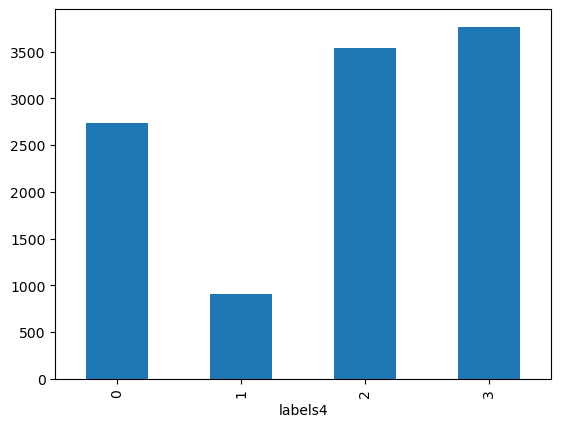

In [488]:
areas4.plot.bar()
plt.show()

### So for this one dont worry about the variables with a number at the end

In [466]:
k3means = df_for_clustering.groupby('labels3').mean()
k3means.T

labels3                            0              1            2
Population                 -0.001521      -0.001806    -0.001597
White Population           -0.001542      -0.001916    -0.001479
Black Population           -0.001173       0.000040    -0.003417
Asian Population           -0.001643      -0.003354    -0.000340
Pop w/ Bachelor degree     -0.001321       0.000520    -0.003541
median_hh_income       -70253.310345 -167483.014815  8801.280423
area_sqkm                  10.758022      40.412079    12.582975
pop1                        0.103448       0.140741     0.105820
white_pop1                  0.110345       0.125926     0.185185
black_pop1                  0.393103       0.585185     0.190476
bach_pop1                   0.389655       0.659259     0.164021
asian_pop1                  0.320690       0.311111     0.407407
labels4                     0.800000       2.585185     0.671958

In [467]:
k4means = df_for_clustering.groupby('labels4').mean()
k4means.T

labels4                            0             1              2  \
Population                 -0.001679     -0.001311      -0.001687   
White Population           -0.001735     -0.001099      -0.001732   
Black Population           -0.001769     -0.003532      -0.000981   
Asian Population           -0.001046     -0.000124      -0.002402   
Pop w/ Bachelor degree     -0.001907     -0.003870      -0.000625   
median_hh_income       -44652.093220  23584.157480 -108569.447674   
area_sqkm                  11.608473      7.140872      20.590738   
pop1                        0.084746      0.133858       0.104651   
white_pop1                  0.110169      0.204724       0.127907   
black_pop1                  0.330508      0.157480       0.441860   
bach_pop1                   0.334746      0.141732       0.470930   
asian_pop1                  0.338983      0.456693       0.296512   
labels3                     0.525424      2.000000       0.325581   

labels4                             3  
Population                  -0.001697  
White Population            -0.001751  
Black Population             0.000687  
Asian Population            -0.004023  
Pop w/ Bachelor degree       0.000847  
median_hh_income       -191184.481013  
area_sqkm                   47.665089  
pop1                         0.177215  
white_pop1                   0.126582  
black_pop1                   0.696203  
bach_pop1                    0.696203  
asian_pop1                   0.291139  
labels3                      1.000000

### Creating the tidy tables so then we can make graphs

In [468]:
tidy4 = df_for_clustering.set_index('labels4')
tidy4 = tidy4[master_columns]
tidy4 = tidy4.stack()
tidy4 = tidy4.reset_index()
tidy4 = tidy4.rename(columns = {'level_1': 'Attributes', 0: 'Values'})
tidy4

labels4              Attributes        Values
0           1              Population     -0.001949
1           1        White Population     -0.001761
2           1        Black Population     -0.002564
3           1  Pop w/ Bachelor degree     -0.012973
4           1        Asian Population     -0.002463
...       ...                     ...           ...
3679        0        White Population      0.000772
3680        0        Black Population     -0.000759
3681        0  Pop w/ Bachelor degree      0.003809
3682        0        Asian Population      0.000562
3683        0        median_hh_income -42575.000000

[3684 rows x 3 columns]

In [469]:
tidy3 = df_for_clustering.set_index('labels3')
tidy3 = tidy3[master_columns]
tidy3 = tidy3.stack()
tidy3 = tidy3.reset_index()
tidy3 = tidy3.rename(columns = {'level_1': 'Attributes', 0: 'Values'})
tidy3

labels3              Attributes        Values
0           2              Population     -0.001949
1           2        White Population     -0.001761
2           2        Black Population     -0.002564
3           2  Pop w/ Bachelor degree     -0.012973
4           2        Asian Population     -0.002463
...       ...                     ...           ...
3679        0        White Population      0.000772
3680        0        Black Population     -0.000759
3681        0  Pop w/ Bachelor degree      0.003809
3682        0        Asian Population      0.000562
3683        0        median_hh_income -42575.000000

[3684 rows x 3 columns]

### Below we will create the nice seaborn facet grids

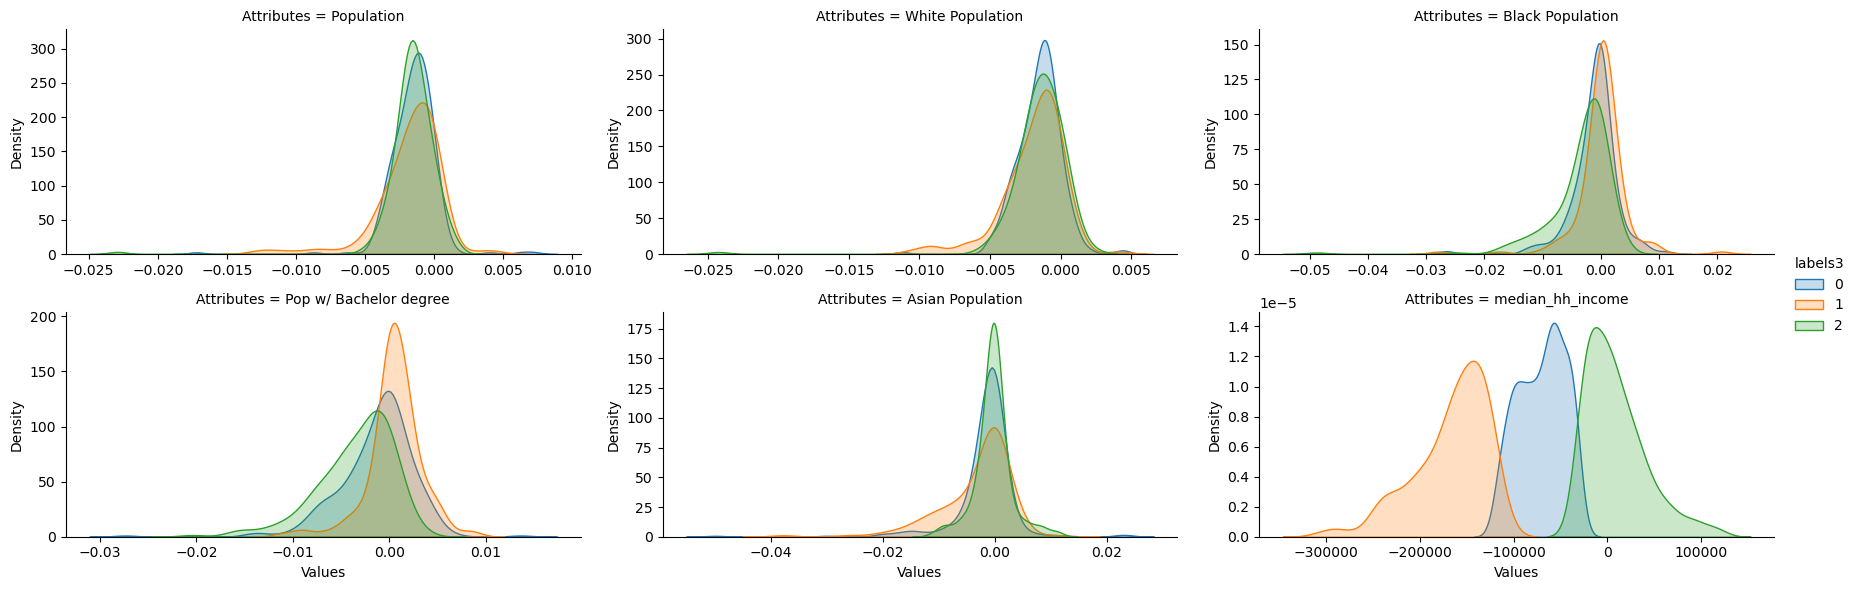

In [489]:
 facets = sns.FacetGrid(data = tidy3, col = 'Attributes', hue = 'labels3', sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.kdeplot, 'Values', shade = True).add_legend()
plt.show()

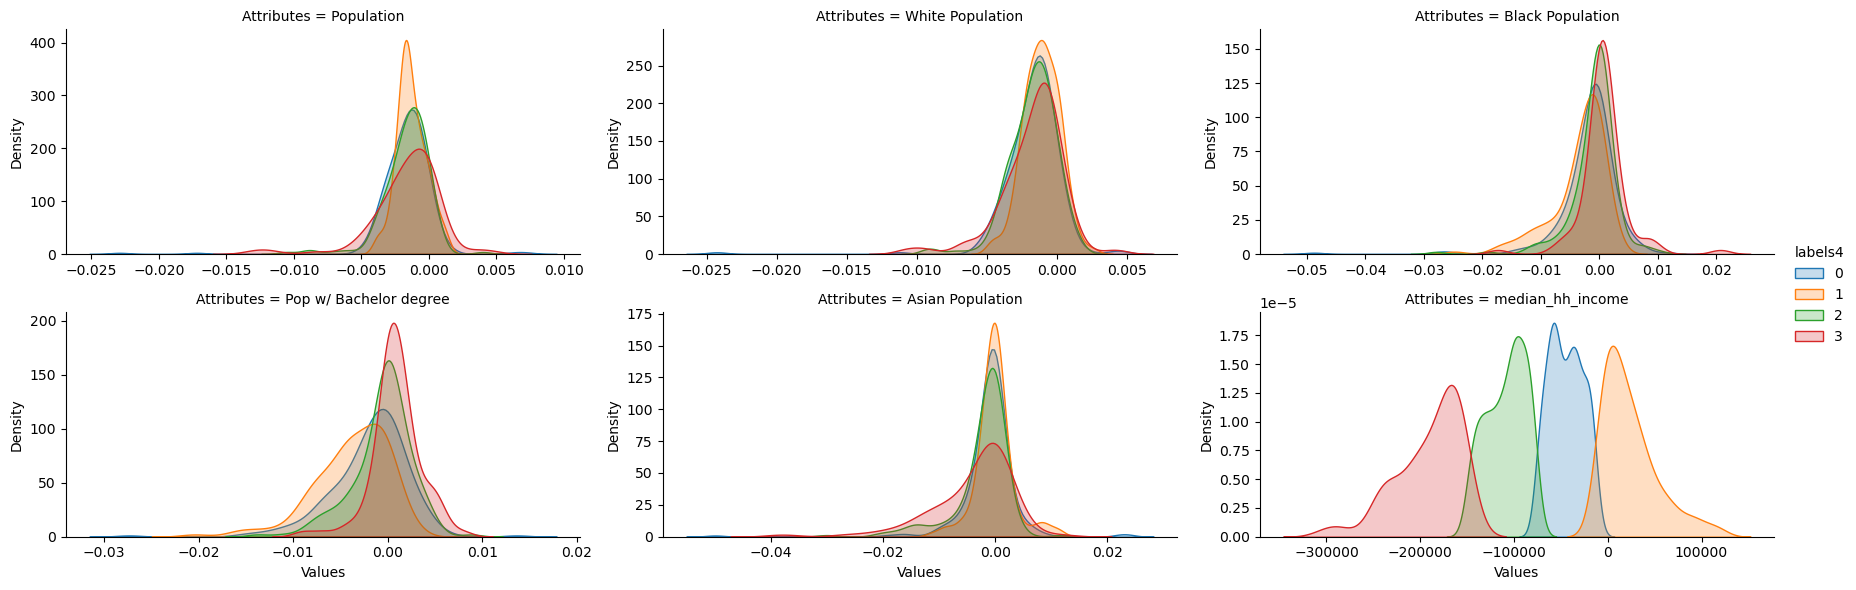

In [471]:
facets = sns.FacetGrid(data = tidy4, col = 'Attributes', hue = 'labels4', sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.kdeplot, 'Values', shade = True).add_legend()
plt.show()

Question 4: (10 pts)
Based on the findings from your clustering analysis are you able to answer the question
you originally posed? If yes, why? If not, what information might you be lacking?


Alright, so from looking at the pdf plots, there is not much you can gather from the variabels on population demographic, but I was interested in the tracts that made more money for themselves over the two years. I am happy to see that the clusters grouped tracts mainly based on median household income. This is what I was most interested. It is a bummer that there wasn't much difference in the demographics, it wouldve been pretty nice if you could see a big change in at least one other variable.

One thing to look into is the analysis I conducted on the 2017 "richest" tracts and then compared that to the blocks that increased in median household income. 97 tracts increased in median household income, of those 97, 91 live in the top half of the tracts ordered from hightest household income to lowest household. Also, in the top 88 tracts for median household income, we notice that half of those that showed an increase in household income. 

Notice the 4 labels plot has very little area in cluster 2, which I beleive is the cluster with the highest change in median income.